<a href="https://colab.research.google.com/github/sid1336/Computational-Physics-Projects/blob/main/Photonic_Crystals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstact:

This research project is centered on exploring the potential interactions between dark matter particles and photonic crystals. Specifically, the project aims to verify the findings presented in the paper "Dark Matter Searches on a Photonic Chip" (https://arxiv.org/abs/2401.17260v1). The study leverages advanced computational techniques to simulate how wave-like dark matter particles could interact with the electromagnetic fields in photonic crystal structures. The ultimate objective is to validate the hypothesis that photonic crystals, due to their unique properties, could serve as a novel platform for detecting dark matter through its influence on guided electromagnetic modes.

In [ ]:
!pip install legume-gme

# Introduction to Photonic Crystals and Guided Mode Expansion

Photonic crystals (PhCs) are a class of optical materials characterized by their periodic dielectric structure, which enables precise control over the propagation of light. By engineering the periodicity and material composition of these structures, one can manipulate the photonic band structure, creating band gaps where certain frequencies of light cannot propagate. This ability to control light at the wavelength scale has led to a wide range of applications, from highly efficient waveguides to the realization of novel optical devices such as photonic crystal lasers and sensors.

In the context of this research, photonic crystals are explored as potential detectors for wave-like dark matter. The hypothesis is that dark matter, modeled as an ultralight bosonic field, could interact with the electromagnetic fields within a photonic crystal. The periodic structure of the PhC could enhance the interaction between the dark matter field and the photons, potentially leading to observable effects that could be detected experimentally.

To accurately model and simulate these interactions, we employ the Guided Mode Expansion (GME) method, a powerful computational approach for analyzing photonic crystal slabs. The GME method allows for the efficient calculation of the photonic band structure and the modes' interaction with external fields, such as those hypothesized to arise from dark matter. This method is particularly well-suited for dealing with the complex geometries and material compositions typical of photonic crystals.

In this project, we utilize the Legume library, an open-source implementation of the GME method, which has been specifically designed for the inverse design of photonic crystal structures. The use of automatic differentiation within Legume enables efficient gradient-based optimization of the photonic crystal parameters, allowing us to explore a wide parameter space and identify configurations that could maximize the interaction with dark matter.

By combining the theoretical framework of dark matter as a wave-like particle with the sophisticated simulation capabilities of the GME method, this research seeks to provide new insights into the potential for photonic crystals to serve as dark matter detectors. The results of this project could have significant implications for the field of dark matter detection, offering a new avenue for experimental searches that complement existing approaches.

Utilizing the Legume Library for Guided Mode Expansion

In this research, we leverage the Legume library, a Python implementation of the Guided Mode Expansion (GME) method, to simulate and analyze photonic crystal slabs. Legume, which stands for "LE Guided Mode Expansion," provides a powerful toolset for studying the electromagnetic properties of photonic crystals, including multilayer structures. The library supports plane-wave expansion for purely 2D structures and is equipped with an autograd backend, enabling the efficient computation of gradients for all output values with respect to all input parameters. This feature is particularly advantageous for inverse design applications, where optimization of the photonic crystal's parameters is necessary to achieve desired electromagnetic properties.

In [ ]:
import legume
from legume import GuidedModeExp, PhotCryst, Lattice, gme
from legume.minimize import Minimize
import matplotlib.pyplot as plt
import time
import autograd.numpy as np
from autograd import grad, value_and_grad

The foundational work on Legume, as detailed in the paper "Inverse design of photonic crystals through automatic differentiation" by Minkov et al. (2020)(https://pubs.acs.org/doi/10.1021/acsphotonics.0c00327), highlights the versatility and computational efficiency of this approach in photonic crystal research.

Legume's ability to handle complex photonic structures and its integration with autograd makes it an essential tool for our project, where the goal is to simulate the interaction of dark matter with photonic crystals. By using Legume, we can explore a wide range of configurations, optimizing the photonic crystal's properties to enhance potential dark matter detection.

# Defining Parameters and Initializing the Photonic Crystal Structure

The first step in our simulation involves defining the key parameters that characterize our photonic crystal structure. These parameters are crucial as they dictate the physical and electromagnetic properties of the crystal, which in turn influence how it interacts with dark matter particles.

In [ ]:
D = 1
eps_b = 11.3
eps_lower, eps_upper = 1.0, 1.0
gmax = 10
c = 1
numeig = 10

The parameters include the thickness of the photonic crystal layer (D), the radius of the holes (r), and the dielectric constants of the core (eps_c) and background (eps_b). The lattice is defined using Nx and Ny, which specify the number of periods in the x and y directions.

With these parameters defined, we initialize the photonic crystal structure using the Legume library. The GME method will then be applied to compute the electromagnetic modes of this structure. By carefully choosing and adjusting these parameters, we aim to create a photonic crystal that is optimally tuned to interact with wave-like dark matter particles, potentially leading to detectable electromagnetic signatures.

# Setting Up the Photonic Crystal Lattice

### Lattice Definition:

The Lattice object is initialized with two basis vectors, [1/10., 0] and [0, 1/10.], which define a rectangular lattice with a periodicity of 1/10 in both the x and y directions. This lattice forms the backbone of the photonic crystal, determining how the dielectric materials are periodically arranged.

### Photonic Crystal Initialization:

The PhotCryst object is then created using the defined lattice, along with the dielectric constants of the lower (eps_lower) and upper (eps_upper) claddings. These layers are essential for controlling the boundary conditions and the confinement of electromagnetic modes within the photonic crystal.

### Adding Layers:

A layer is added to the photonic crystal with a thickness D and a background dielectric constant eps_b. This layer represents the core structure of the photonic crystal, where the interaction between light and the photonic crystal occurs.

In [ ]:
lattice = legume.Lattice([1/10.,0],[0,1/10.])
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)

## Defining the Path in the Brillouin Zone

In [ ]:
path = lattice.bz_path([[0, 0], [4 * 2 * np.pi, 0]], [10])
print("K-points path:", path['kpoints'])


### Path Definition:

We define a path in the Brillouin zone from the origin [0, 0] to [4 * 2 * np.pi, 0], with 10 interpolation points. This path will guide the simulation through specific k-points in the Brillouin zone, allowing us to explore the dispersion relations of the photonic modes.

### K-points:

The path object contains the kpoints which represent the wavevectors along the defined path in the Brillouin zone. These k-points are crucial for computing the band structure and understanding how the photonic modes evolve with changing wavevectors.

## Simulation options

Before running the simulation, we define specific options that will guide the Guided Mode Expansion (GME) process.

In [ ]:
options = {'gmode_inds': [1, 3, 5, 7, 9],  # Take only the modes with H in the xy-plane
           'numeig': numeig,
           'verbose': True
           }

## Running the Guided Mode Expansion (GME)

With the lattice, photonic crystal structure, and simulation options defined, we proceed to initialize and run the Guided Mode Expansion (GME).

In [ ]:
gme = GuidedModeExp(phc, gmax=gmax)
npw = np.shape(gme.gvec)[1]  # Number of plane waves in the expansion
print(f'Number of reciprocal lattice vectors in the expansion: npw = {npw}')

# Run the simulation
gme.run(kpoints=path['kpoints'], **options)

## Visualizing the Photonic Crystal

Finally, we visualize the photonic crystal and the results of the simulation to gain insights into the behavior of the electromagnetic modes within the structure.

In [ ]:
def plot_structure_side_by_side(phc):
    fig = plt.figure(constrained_layout=True, figsize=(10, 10))
    gs = fig.add_gridspec(1, 3)

    # Plot yz view
    ax1 = fig.add_subplot(gs[0])
    legume.viz.structure(phc, yz=True, xy=False, xz=False, fig=fig, gridspec=gs[0],cbar=False)


    # Plot xy view
    ax2 = fig.add_subplot(gs[1])
    legume.viz.structure(phc, yz=False, xy=True, xz=False, fig=fig, gridspec=gs[1],cbar=False)


    # Plot xz view
    ax3 = fig.add_subplot(gs[2])
    legume.viz.structure(phc, yz=False, xy=False, xz=True, fig=fig, gridspec=gs[2],cbar=False)


    plt.show()

# Example usage with your photonic crystal object
plot_structure_side_by_side(phc)

## Visualizing the Band Structure

The band structure of a photonic crystal is a crucial aspect that reveals the allowed and forbidden frequencies for photons as they propagate through the crystal. By plotting the band structure, we can visualize the dispersion relation of the photonic modes and identify the photonic band gaps, where light propagation is prohibited. This information is vital for understanding how the photonic crystal interacts with external electromagnetic fields, such as those potentially generated by dark matter.

In [ ]:
fig, ax = plt.subplots(1, figsize=(7, 7))
legume.viz.bands(gme, figsize=(5, 5), Q=True, ax=ax, k_units=True)
ax.set_ylim([0, 0.75])
ax.set_xlim([0, 0.75])
ax.set_xlabel("Wavevector")
ax.set_ylabel(r"$\omega a/2\pi c$")
ax.xaxis.grid(True)
plt.show()

# Visualizaing EM fields for different configurations

In [ ]:

legume.viz.field(gme, 'H', 1, 1, z=D/2, periodic=True, val='im')


In [ ]:
legume.viz.field(gme, 'H', 1, 1, z=D, periodic=True, val='re')


In [ ]:
legume.viz.field(gme, 'H', 1, 1, z=D/2, periodic=True, val='abs')


In [ ]:
legume.viz.field(gme, 'D', 1, 1, z=D/2, periodic=True, val='im')


In [ ]:
legume.viz.field(gme, 'D', 1, 1, z=0, periodic=True, val='re')


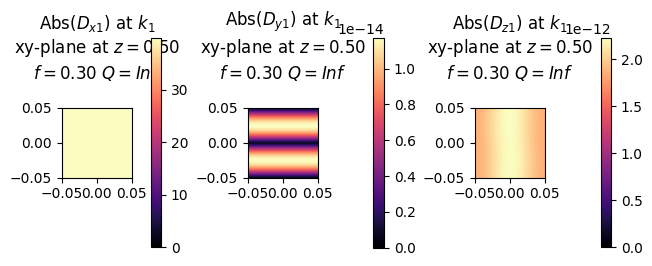

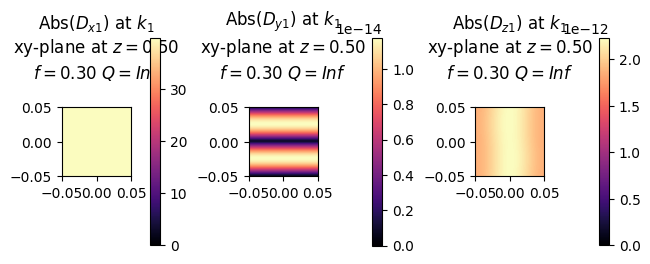

In [17]:
legume.viz.field(gme, 'D', 1, 1, z=D/2, periodic=True, val='abs')

##  Comparing Band Structure with Reference Data

A critical part of validating our simulation is to compare the computed band structure with reference data provided by previous studies, specifically those obtained by our professor using the MPB (MIT Photonic Bands) package. This comparison allows us to assess the accuracy of the Guided Mode Expansion (GME) method as implemented in Legume and to ensure that our model faithfully reproduces known results.

In [18]:

n1_data = np.array([
    [0.05656324478351993, 0.019112207151664506],
    [0.2263314060641448, 0.08569667077681853],
    [0.7355051783559106, 0.22996300863131935],
    [1.2163929712042465, 0.36683107274969173],
    [1.6171400603306434, 0.48397040690505544],
    [2.2300465187883347, 0.6627620221948212],
    [2.8005123892764257, 0.8255240443896423],
    [3.856600715427886, 1.1350184956843403],
    [3.9933308062433666, 1.1769420468557337]
])

n2_data = np.array([
    [0.20294275269810447, 0.157213316892725],
    [0.6790929780302934, 0.28298397040690504],
    [1.16937166957863, 0.40628853267570864],
    [1.994417164459821, 0.6381011097410603],
    [2.7440246667218577, 0.846485819975339],
    [3.545513035572424, 1.0782983970406907],
    [3.9910389970648, 1.2040690505548703]
])

n3_data = np.array([
    [0.3446573106243802, 0.31504315659679416],
    [0.811306258614255, 0.40752157829839697],
    [1.3392763518115902, 0.530826140567201],
    [1.8955498526590373, 0.6689272503082615],
    [2.480135475259936, 0.8255240443896423],
    [3.479602462605606, 1.099260172626387],
    [3.988767520794031, 1.2398273736128238]
])

my plot

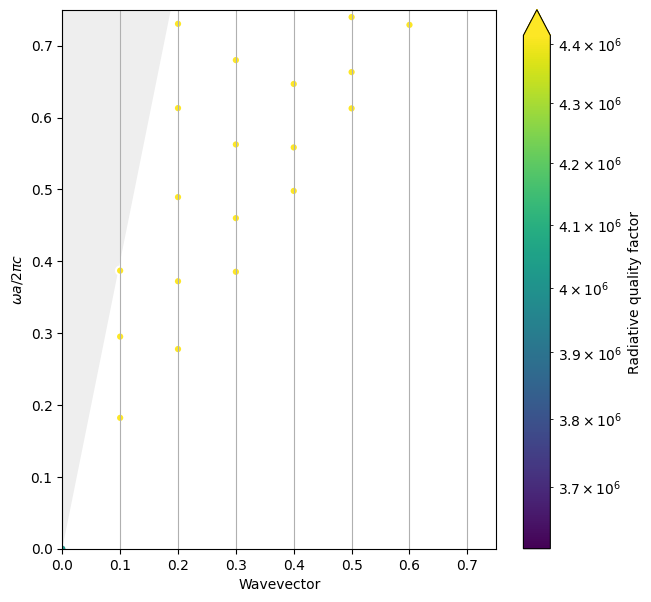

In [19]:
fig, ax = plt.subplots(1, figsize=(7, 7))
legume.viz.bands(gme, figsize=(5, 5), Q=True, ax=ax, k_units=True)
ax.set_ylim([0, 0.75])
ax.set_xlim([0, 0.75])
ax.set_xlabel("Wavevector")
ax.set_ylabel(r"$\omega a/2\pi c$")
ax.xaxis.grid(True)
plt.show()

## Interpretation of Comparison Results

The comparison between the GME simulation and the reference data is not just a validation step; it is also an opportunity to understand the nuances of photonic crystal behavior under different conditions. For instance, small deviations in the band structure could highlight the sensitivity of the photonic crystal to material properties or geometric parameters, which is crucial for optimizing the crystal for specific applications, such as dark matter detection.

This comparison ultimately strengthens the credibility of our simulation results and provides a solid foundation for further theoretical and experimental exploration.

Super imposed plot

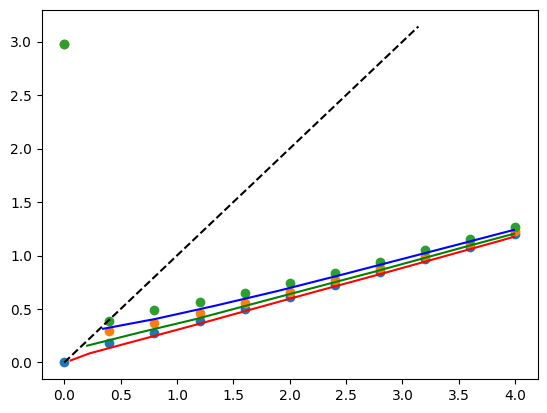

In [20]:
# Plot the simulation results for n1, n2, and n3 over lapping the previous results
ax.set_ylim([0, 1.5])
ax.set_xlim([0, np.pi])
ax.set_xlabel("Wavevector")
ax.set_ylabel(r"$\omega a/2\pi c$")
ax.legend()
ax.xaxis.grid(True)
plt.show()

k_values = path['kpoints'][0]/(2.*np.pi)
plt.plot(k_values, gme.freqs.transpose()[0],'o')
plt.plot(k_values, gme.freqs.transpose()[1],'o')
plt.plot(k_values, gme.freqs.transpose()[2],'o')
# Adding the given data points for n1, n2, and n3 as lines
plt.plot(n1_data[:, 0], n1_data[:, 1], 'r-', label='n1 Data')
plt.plot(n2_data[:, 0], n2_data[:, 1], 'g-', label='n2 Data')
plt.plot(n3_data[:, 0], n3_data[:, 1], 'b-', label='n3 Data')

# Plot the light line
k_values = np.linspace(0, np.pi, 100)
light_line = k_values
plt.plot(k_values, light_line, 'k--', label='Light Line $\omega = ck$')
plt.show()

## Introduction of a Cavity in the Photonic Crystal


Here’s how you can structure the markdown section that introduces the cavity into the photonic crystal and runs the corresponding simulation:

Introduction of a Cavity in the Photonic Crystal
In this section, we introduce a defect or cavity within the photonic crystal structure. The introduction of a cavity is a significant modification as it can localize electromagnetic modes, creating resonant states with high quality factors (Q-factors). These resonant states are particularly important in applications such as lasers, sensors, and, in the context of this project, potentially enhancing the interaction with dark matter.

Plane waves used in the expansion = 13.
Number of reciprocal lattice vectors in the expansion: npw = 13
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │███████-------------│   37% │
│ Inverse matrix of Fourier-space permittivity              │ 0.004    │ │████----------------│   24% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │██------------------│   11% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.015    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Cavity quality factor: 1904666762625148562958809300992.00


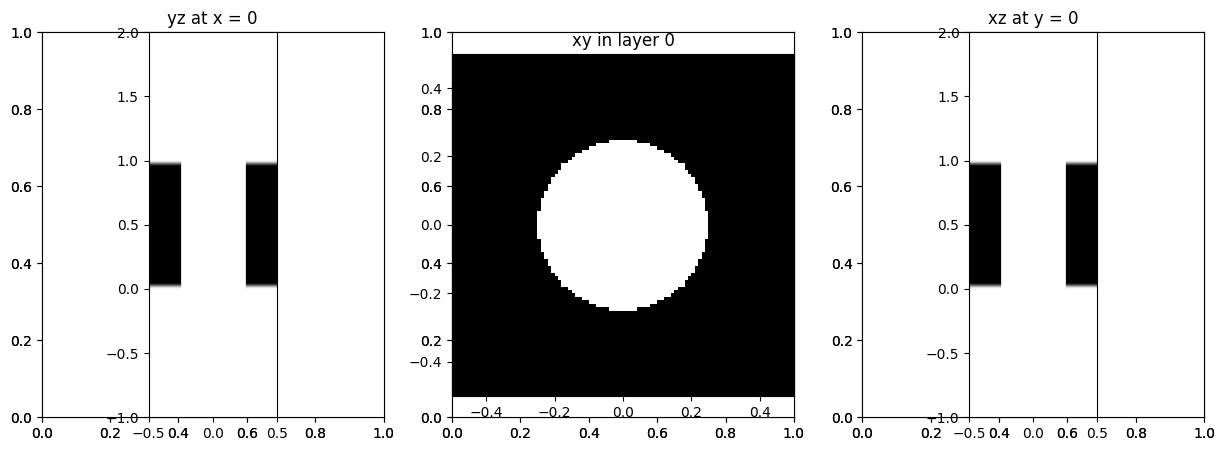

In [21]:
D, r, eps_c, eps_b = 1, 0.25, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))

a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=r, x_cent=0., y_cent=0))
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
options = {'gmode_inds': [1], 'verbose': True, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')

def cavity(dx, dy):
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=D, eps_b=eps_b)
    phc.add_shape(legume.Circle(x_cent=xc + dx[0], y_cent=yc + dy[0], r=r))
    return phc

def gme_cavity(dx, dy, gmax, truncate_g, options):
    phc = cavity(dx, dy)
    options['compute_im'] = False
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    (freq_im, _, _) = gme.compute_rad(0, [Nx * Ny])
    Q = gme.freqs[0, Nx * Ny] / 2 / freq_im[0]
    return (gme, Q)

# Run GME simulation and visualize results
(gme, Q) = gme_cavity(dx, dy, gmax, truncate_g, options)
print("Cavity quality factor: %1.2f" % Q)

# Function to plot the structure from different views side by side
def plot_structure_side_by_side(phc):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    gs = fig.add_gridspec(1, 3)

    # Plot yz view
    ax1 = fig.add_subplot(gs[0])
    legume.viz.structure(phc, yz=True, xy=False, xz=False, fig=fig, gridspec=gs[0],cbar=False)


    # Plot xy view
    ax2 = fig.add_subplot(gs[1])
    legume.viz.structure(phc, yz=False, xy=True, xz=False, fig=fig, gridspec=gs[1],cbar=False)


    # Plot xz view
    ax3 = fig.add_subplot(gs[2])
    legume.viz.structure(phc, yz=False, xy=False, xz=True, fig=fig, gridspec=gs[2],cbar=False)

# Example usage with your photonic crystal object
plot_structure_side_by_side(phc)


The introduction of a cavity within the photonic crystal is a crucial step in our study, as it allows us to explore localized modes that could enhance the interaction with dark matter. By analyzing the Q-factor and visualizing the structure, we gain insights into the efficiency and effectiveness of the cavity design.

## Calculating the Field Integrals

In this section, we focus on the computation of the field integrals, a crucial step in analyzing the electromagnetic fields within the photonic crystal. These integrals help us understand how the fields distribute within the structure, which is essential for evaluating the interaction between the photonic crystal and potential dark matter particles.

### Defining the Photonic Crystal Structure

We begin by setting up the photonic crystal with the same parameters used in previous sections, but this time focusing on the calculation of the field integrals.

In [22]:
# Define parameters
D, r, eps_c, eps_b = 1, 0.25, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))
# Initialize lattice and photonic crystal
a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
options = {'gmode_inds': [1,5, 9, 13, 17], 'verbose': False, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}

## Defining the Cavity

The next step involves defining the cavity within the photonic crystal, which will be the focal point for the field integral calculations.

Cavity Function:  This function defines a photonic crystal with a single-hole cavity. The cavity is centered at coordinates (xc + dx, yc + dy) and has a specified radius (r). The function returns a photonic crystal object that can be used for further simulations.

## Running the GME Simulation for the Cavity

We then proceed to run the Guided Mode Expansion (GME) simulation for the defined cavity.

### Guided Mode Expansion for the Cavity

The gme_cavity function sets up the photonic crystal with the specified cavity parameters and runs the GME simulation.

The function returns the GuidedModeExp object, which contains the results of the mode calculation.

In [23]:
def cavity(dx, dy, radius):
    """
    Define single-hole PhC cavity. Returns the photonic crystal object.
    Args:
        dx : x offset of the hole center
        dy : y offset of the hole center
        radius: radius of the whole.

    """
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=D, eps_b=eps_b)
    phc.add_shape(legume.Circle(eps=eps_c,x_cent=xc + dx[0], y_cent=yc + dy[0], r=radius))
    legume.viz.structure(phc, xy=True, figsize=2., cbar=False)
    return phc

def gme_cavity(dx, dy, radius, gmax, truncate_g, options):
    """
    Run the mode calculation and return the resulting GuidedModeExp object
    Args:
        dx : x offset of the hole center
        dy : y offset of the hole center
        radius: radius of the whole.
        gmax : maximum length of the 2D wavevector to include in the calculation
        truncate_g : truncation scheme for the vectors, 'abs' or 'tbt'
        options : options
    """
    phc = cavity(dx, dy, radius)
    options['compute_im'] = False
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    return(gme)

Computing the Field Integral

Finally, we calculate the field integrals using a custom function that leverages the analytic parametrization provided in the supplementary material of the referenced paper.

In [24]:
def integral_E_j(num_layers, j, A_j, B_j, X_j, omega, eps_j, g, d_j, g_hat):
    """
    Compute the Integral[E(z) z] over one layer using the analytic parametrization given in the supplementary material
    https://pubs-acs-org.ezproxy.library.yorku.ca/doi/suppl/10.1021/acsphotonics.0c00327/suppl_file/ph0c00327_si_001.pdf
    Note that this function is called for several wavenumbers g simultaneously, so that A_j, etc are all vectors [A_j1, Aj2, ...]
    Args:
        num_layers: number of layers in the photonic structure
        j: layer index from 0 to num_layers - 1
        A_j, B_j: expansion coefficients of the guided modes in the homogeneous waveguide
        X_j: quantity related to the frequency, Eq. S10 in the supplementary info
        omega: frequency of the mode
        eps_j: average dielectric constant in the j'th layer
        g: magnitude of the 2D wavevector
        d_j: thickness of the j'th layer
        g_hat: unit wavevector
    """

    N = num_layers - 1
    c = 1
    if j == 0:
        g_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = -c * 1j / (omega * eps_j * X_j) * ( (B_j - A_j) * g)
    elif j == N:
        g_hat_coef = c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
    else:
        g_hat_coef =-2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((B_j - A_j) * X_j)
        z_hat_coef =-2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((A_j + B_j) * g)
    return(np.array([g_hat_coef*g_hat[0], g_hat_coef*g_hat[1], z_hat_coef]))

## Summary of Field Integral Calculations

The field integral calculation is a critical step in the analysis of the photonic crystal, providing detailed information about the electromagnetic fields within the structure. By understanding these fields, we can better predict and optimize the photonic crystal's interaction with external influences, enhancing its potential for applications such as dark matter detection.

# Debugging: Print the guided mode arrays


In [25]:
kpoints = np.array([[0], [0]])
gme.run(kpoints=kpoints, **options)

print(gme.g_array.__sizeof__())
print(gme.omegas_tm.__sizeof__())
print(gme.coeffs_tm.__sizeof__())
print(gme.gvec.__sizeof__())
print(gme.delta_gx.__sizeof__())
print(gme.eigvecs.__sizeof__())

72
72
72
128
24
72


#Compute the overlap factor using the analytic layer integrals


The overlap factor is a crucial quantity in photonic crystal simulations as it quantifies the interaction between a guided electromagnetic mode and the underlying material structure. Specifically, it measures how well a particular mode overlaps with the photonic crystal's dielectric distribution. This factor is essential for understanding the efficiency and effectiveness of mode confinement and is particularly relevant in applications where strong light-matter interactions are desired, such as in sensors or dark matter detection.

The function calculate_overlap_factor is designed to compute the overlap factor for a given mode within the photonic crystal, leveraging the analytic layer integrals derived earlier.


gme : GuidedModeExp object of the structure


mind : index of the mode for which to compute the integral

In [26]:
def calculate_overlap_factor(gme, mind):

    kind = 0
    k = gme.kpoints[:, kind]
    kx, ky = k[0], k[1]
    gkx = gme.gvec[0, :] + kx + gme.delta_gx
    gky = gme.gvec[1, :] + ky
    gk = np.sqrt(np.square(gkx) + np.square(gky))
    # Unit vectors in the propagation direction; we add a tiny component
    # in the x-direction to avoid problems at gk = 0
    # analogous to ghat in the legume paper
    pkx = gkx / gk
    pky = gky / gk

    # Get the coefficients for the TM mode
    omega = gme.freqs[kind][mind] * 2 * np.pi
    evec = gme.eigvecs[kind][:, mind]
    num_layers = gme.eps_array.size
    total_integral = 0.
    for lind in range(num_layers):
        eps_j = gme.eps_array[lind]

        # Index of the |G|=0 reciprocal lattice vector
        zero_G_index = gk.argmin()

        if lind == 0 or lind == num_layers - 1:
            d_j = np.inf
        else:
            d_j = gme.d_array[lind-1]
        count = 0
        for im1 in range(gme.gmode_include[kind].size):

            mode1 = gme.gmode_include[kind][im1]
            (indmode, oms, As, Bs, chis) = gme._get_guided(gk, kind, mode1)

            if mode1 % 2 == 0:
                print("UH OH TE MODE")

            g_hat = np.array([pkx[indmode],pky[indmode]])
            g_norm = gk[indmode]
            # the quantity below should be equal to the the x-y integral of Exp[i G rho]epsbar(z)/eps(x,y,z)
            inv_eps_ft_at_G = gme.phc.lattice.ec_area*eps_j*gme.eps_inv_mat[lind][indmode,zero_G_index]


            res = integral_E_j(num_layers, lind, As[lind,:], Bs[lind,:], chis[lind,:], omega, eps_j, g_norm, d_j, g_hat)
            vals = evec[count:count+gme.modes_numg[kind][im1]]/np.sqrt(gme.phc.lattice.ec_area)
            total_integral += np.array([np.abs(np.dot(vals,inv_eps_ft_at_G*Ej_integral)) for Ej_integral in res])
            count += gme.modes_numg[kind][im1]

    V_u = D*gme.phc.lattice.ec_area
    eta_u = total_integral/np.sqrt(V_u)
    print("eta_u = ", eta_u)
    return eta_u


# Function Breakdown

### Wavevector Components (gkx, gky):

The wavevectors are calculated based on the guided mode expansion (GME) object, incorporating small adjustments to avoid singularities at  gk=0.


These wavevectors are crucial for determining the direction of propagation and the overlap of the mode with the material structure.

###Unit Propagation Vectors (pkx, pky):

The unit vectors in the direction of propagation are derived by normalizing the wavevectors. These vectors are used to calculate the overlap between the electromagnetic mode and the material's dielectric profile.
###TM Mode Coefficients:

The function retrieves the expansion coefficients for the transverse magnetic (TM) mode using the mode index (mind). These coefficients describe the distribution of the electromagnetic field in the crystal.
###Integral Calculation:

The function iterates over each layer of the photonic crystal, computing the integral of the electric field components (g_hat_coef, z_hat_coef) for each layer.
The results of these integrals are accumulated to determine the total overlap factor, which is normalized by the volume of the unit cell (V_u).

###Final Overlap Factor (eta_u):

The overlap factor is computed by normalizing the total integral with respect to the volume of the unit cell. This factor provides a measure of how well the mode interacts with the material, with higher values indicating stronger interaction.


## Significance of the Overlap Factor

The overlap factor is a critical parameter in the analysis of photonic crystals, particularly when evaluating the potential for applications that require strong light-matter interactions. In the context of this project, a high overlap factor may indicate an enhanced ability of the photonic crystal to interact with wave-like dark matter particles, potentially leading to observable effects that can be experimentally detected.

This function, therefore, serves as a key tool in our study, allowing us to quantify and optimize the interaction between the guided modes and the photonic crystal structure.

## Visualizing the Overlap Factor ηu vs. Cavity Radius

To better understand the relationship between the cavity size and the overlap factor
ηu, we generate and visualize a graph that shows how
ηu
  varies with the radius of the cavity. This analysis is critical for optimizing the cavity design, as the overlap factor directly influences the interaction strength between the guided modes and the photonic crystal structure.

In [27]:
def generate_eta_u_vs_radius_graph(radii):
    eta_u_values = []
    for radius in radii:
        gme = gme_cavity(dx, dy, radius, gmax=gmax, truncate_g=truncate_g, options=options)
        eta_u = np.array([np.abs(calculate_overlap_factor(gme,m)[2]) for m in range(5)])
        eta_u_values.append(eta_u)
    return(np.array(eta_u_values))
# Define the range of radii
radii = np.linspace(0.1, 0.4, 10)  # Example: radii from 0.1 to 0.5

# Function to generate eta_u vs. radius graph

After generating the overlap factor data, we visualize the results by plotting
ηu against the cavity radius.

Plane waves used in the expansion = 13.
eta_u =  [2.21725699e+02 1.99309701e-23 5.21134243e-09]
eta_u =  [5.44440834e-21 7.32903542e-30 3.32016534e-17]
eta_u =  [2.50673017e-21 2.47427799e-16 5.93411799e-17]
eta_u =  [2.47430284e-16 2.28592340e-30 2.31695063e-16]
eta_u =  [1.84897353e-23 4.74603963e-32 1.91146542e-02]
Plane waves used in the expansion = 13.
eta_u =  [3.07420740e+02 1.38595089e-23 7.19970709e-09]
eta_u =  [2.18526471e-21 3.10953019e-29 1.72445320e-16]
eta_u =  [2.15206492e-16 2.83789916e-30 1.89200902e-16]
eta_u =  [7.87848737e-21 2.15197030e-16 2.85634102e-17]
eta_u =  [8.77290945e-22 2.71232123e-30 3.19545776e-02]
Plane waves used in the expansion = 13.
eta_u =  [3.10497955e+02 7.26890108e-24 7.21341575e-09]
eta_u =  [2.25198945e-21 6.63890357e-30 1.55843474e-16]
eta_u =  [4.09564224e-21 4.53366016e-16 6.57512767e-17]
eta_u =  [4.53379520e-16 3.27738893e-30 9.73291678e-17]
eta_u =  [2.62234698e-21 3.72243349e-30 4.65187473e-02]
Plane waves used in the expansion = 13.


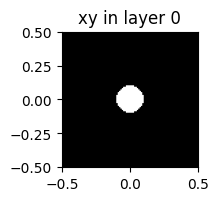

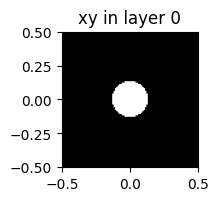

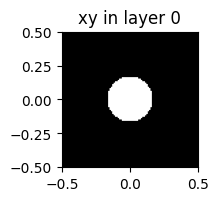

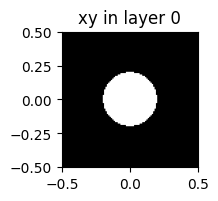

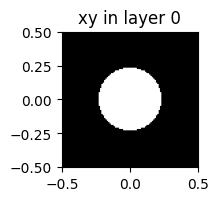

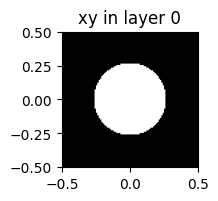

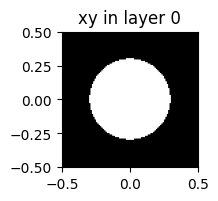

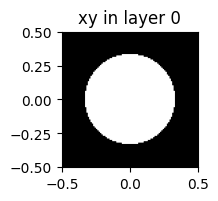

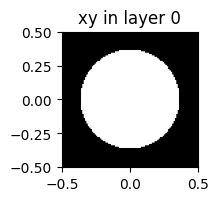

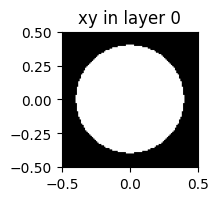

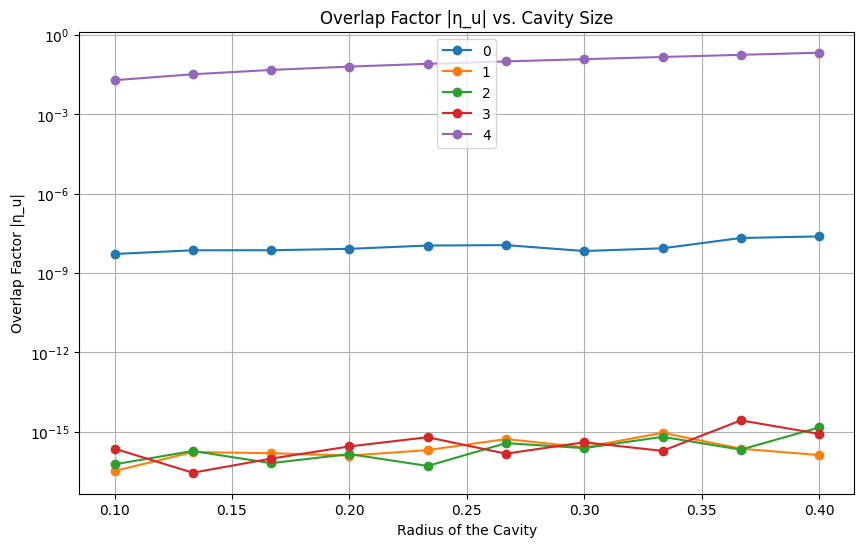

In [28]:
def generate_eta_u_vs_radius_graph(radii):
    eta_u_values = []
    for radius in radii:
        gme = gme_cavity(dx, dy, radius, gmax=gmax, truncate_g=truncate_g, options=options)
        eta_u = np.array([np.abs(calculate_overlap_factor(gme,m)[2]) for m in range(5)])
        eta_u_values.append(eta_u)
    return(np.array(eta_u_values))
# Define the range of radii
radii = np.linspace(0.1, 0.4, 10)  # Example: radii from 0.1 to 0.5
# Generate data for the plot
eta_u_values = generate_eta_u_vs_radius_graph(radii)
# Plotting
plt.figure(figsize=(10, 6))
print(eta_u_values)
for i, eta_us in enumerate(eta_u_values.transpose()):
    plt.plot(radii, eta_us, marker='o', label=str(i))
plt.legend()
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xlabel('Radius of the Cavity')
plt.ylabel('Overlap Factor |η_u|')
#plt.ylabel('Overlap Factor |η_u|^2')
plt.title('Overlap Factor |η_u| vs. Cavity Size')
#plt.title('Overlap Factor |η_u|^2 vs. Cavity Size')
plt.grid(True)
plt.show()

## Insights from the 𝜂𝑢 vs. Radius Graph
The visualization of
𝜂
𝑢
 against the cavity radius provides valuable insights into the optimal design parameters for the photonic crystal. By identifying the radius at which
𝜂
𝑢
 is maximized, we can tailor the photonic crystal structure to achieve the highest possible interaction with the electromagnetic modes. This optimization is key to the success of experiments aimed at detecting dark matter or other phenomena that rely on strong light-matter interactions.

## Running the GME Simulation and Visualizing Overlap Factor vs. Radius

we now run the Guided Mode Expansion (GME) simulation. The goal is to generate and visualize the results, allowing us to observe how the overlap factor varies with the radius of the cavity.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import time
import autograd.numpy as npa
from autograd import grad, value_and_grad
import legume
from legume.minimize import Minimize

# Define parameters
D, r, eps_c, eps_b = 1, 0.25, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))

# Initialize lattice and photonic crystal
a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=r, x_cent=0., y_cent=0))
# Initialize GME
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
options = {'gmode_inds': [1], 'verbose': True, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')


# Define single-hole PhC cavity
def cavity(dx, dy, radius):
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=D, eps_b=eps_b)
    phc.add_shape(legume.Circle(x_cent=xc + dx[0], y_cent=yc + dy[0], r=radius))
    return phc


# Solve for a cavity defined by shifts dx, dy
def gme_cavity(dx, dy, radius, gmax, truncate_g, options):
    phc = cavity(dx, dy, radius)
    options['compute_im'] = False
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    (freq_im, _, _) = gme.compute_rad(0, [Nx * Ny])
    Q = gme.freqs[0, Nx * Ny] / 2 / freq_im[0]
    return (gme, Q)


# Function to calculate the overlap factor
def calculate_overlap_factor(gme, K, m, Nx_grid=50, Ny_grid=50, Nz_grid=50):
    x_grid = np.linspace(-0.5, 0.5, Nx_grid)
    y_grid = np.linspace(-0.5, 0.5, Ny_grid)
    z_grid = np.linspace(-2 * D, 3 * D, Nz_grid)

    integral_numerator = 0.0
    integral_denominator = 0.0

    for z in z_grid:
        # Check for zero frequency modes and handle them
        if np.isclose(gme.freqs[0, m], 0):
            print(f"Warning: Zero frequency encountered for mode {m}. Skipping...")
            return np.nan  # Or any other appropriate value

        field_data_e = gme.get_field_xy('e', kind=0, mind=m, z=z, xgrid=x_grid, ygrid=y_grid, component='z')[0]
        field_data_d = gme.get_field_xy('d', kind=0, mind=m, z=z, xgrid=x_grid, ygrid=y_grid, component='z')[0]
        Ez = field_data_e['z']
        Dz = field_data_d['z']

        phase_factor = 1/np.exp(-1j * (K[0] * x_grid[:, None] + K[1] * y_grid[None, :]))

        integral_numerator += np.sum(Ez * phase_factor) * (x_grid[1] - x_grid[0]) * (y_grid[1] - y_grid[0])
        integral_denominator += np.sum(Ez * Dz) * (x_grid[1] - x_grid[0]) * (y_grid[1] - y_grid[0])

    integral_numerator *= (z_grid[1] - z_grid[0])
    integral_denominator *= (z_grid[1] - z_grid[0])

    V_u = (x_grid[-1] - x_grid[0]) * (y_grid[-1] - y_grid[0]) * (z_grid[-1] - z_grid[0])

    eta_u = (integral_numerator / V_u)/ np.sqrt(integral_denominator / V_u)
    print(eta_u)

    return eta_u


# Function to generate eta_u vs. radius graph
def generate_eta_u_vs_radius_graph(K, radii):
    eta_u_values = []

    for radius in radii:
        global lattice, phc
        lattice = legume.Lattice(a1, a2)
        phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
        phc.add_layer(d=D, eps_b=eps_b)
        phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=radius, x_cent=0., y_cent=0))

        gme, _ = gme_cavity(dx, dy, radius, gmax=gmax, truncate_g=truncate_g, options=options)
        # eta_u = calculate_overlap_factor(gme, K,m=0)

        eta_u = np.array([np.abs(calculate_overlap_factor(gme, K,m=m)) for m in range(5)])
        eta_u_values.append(eta_u**2)

    return radii, np.array(eta_u_values)  # Return the radii and eta_u_values


# Define the range of radii
radii = np.linspace(0.1, 0.55, 20)  # Example: radii from 0.1 to 0.5

# Example Bloch wavevector
K = np.array([0, 0])

# Generate data for the plot
radii_values, eta_u_values = generate_eta_u_vs_radius_graph(K, radii)




Plane waves used in the expansion = 13.
Number of reciprocal lattice vectors in the expansion: npw = 13
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │████----------------│   25% │
│ Inverse matrix of Fourier-space permittivity              │ 0.014    │ │██████████----------│   51% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.002    │ │█-------------------│    6% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.028    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(3.03754713734554e-09+6.079968596351835e-05j)
(-2.5842571411033275e-18-7.864171556439724e-20j)
(2.9166525843952653e-18-1.4517715633707585e-18j)
(1.1885412272918425e-17+8.892829676512622e-18j)
(-0.003865952000285493-8.380076023202739e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.004    │ │█████████-----------│   50% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    5% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   20% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.008    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(3.438754875833088e-09-0.0011948676468815339j)
(-2.0223878813260867e-18-8.53661391403216e-20j)
(-7.7953562295758e-18-6.647648471236503e-18j)
(-9.490117027392271e-18-8.489950380332117e-18j)
(0.00026234985451020467-2.8526160664017233e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │████████------------│   43% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   17% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.012    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-1.116846799188089e-17+6.983476992953002e-19j)
(-1.879802090766043e-17+3.9357152279798334e-18j)
(5.478790315626551e-19-4.716829238902346e-18j)
(0.004860561806726599-1.8258649404744492e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.004    │ │██████████----------│   51% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.002    │ │████----------------│   20% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.008    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-1.3366162577233456e-09+0.0013494124159382954j)
(4.730679354227821e-17-6.097441874927459e-19j)
(9.340181706581761e-18-5.624998503942281e-17j)
(-6.056824216941526e-18+8.861855682529856e-18j)
(-0.009821449989174847-9.5185966088244e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │████████------------│   42% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   16% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.012    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(1.177798988408152e-09-0.004631744786476815j)
(-1.4681323165784336e-18+2.372517064712934e-19j)
(8.081155663642441e-18-9.88719453358774e-18j)
(-1.5380169428090632e-17+2.6077547400042228e-18j)
(-0.015093584587569325+1.0046512225114235e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │███████████---------│   55% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   19% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.009    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-8.157935345388593e-10-0.0018271088555661102j)
(-4.010157871723195e-17+2.46053741286727e-19j)
(-1.0748593689473576e-17+1.212653577220136e-16j)
(1.0366295031386484e-17+2.0256379523782097e-17j)
(0.020677822789645205-2.1018396307582089e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │██------------------│   14% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.012    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-7.400475903738885e-10+0.006374732194938453j)
(-3.415905825955106e-17+5.301658519001136e-19j)
(1.0554971645469728e-17-9.599204574746318e-17j)
(-1.0831583894730443e-17-4.3569336116464856e-17j)
(0.026616534861297367+6.678140739458042e-20j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │██████████----------│   53% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.002    │ │████----------------│   22% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.009    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-6.609894476341378e-10+0.0013486441256301907j)
(1.1068851998605495e-16-1.8186913626448893e-19j)
(4.346705220549432e-18+1.9562683662807597e-17j)
(9.809445947895352e-18-1.3646848753882833e-16j)
(0.03298541976705815-4.460344830616862e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.009    │ │██████████----------│   50% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    2% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.004    │ │████----------------│   24% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.018    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(5.893043903845519e-10+0.0025933896748285205j)
(1.807552583100255e-17-7.616019806563041e-19j)
(1.0560987975190176e-17-1.835025384745316e-16j)
(-1.672111574501721e-17+1.4612482153510864e-16j)
(0.03989344371944364+4.900730124056955e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │███████████---------│   57% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   17% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.010    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(6.244264722607279e-10-0.001970549607226545j)
(-1.2899860005484164e-16-5.337194091054098e-19j)
(2.1225010023857478e-17+2.5629438503488593e-17j)
(1.0184778824413462e-17+4.3657609097644645e-18j)
(0.04748907738236767+4.598609478929606e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │████----------------│   23% │
│ Inverse matrix of Fourier-space permittivity              │ 0.014    │ │█████████-----------│   47% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.002    │ │█-------------------│    6% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.029    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(6.47551840370861e-10+0.003614030494216122j)
(6.193924625267648e-17+6.711221137177591e-20j)
(1.0682185814532089e-17-9.182743963877653e-17j)
(9.674723007646075e-18+9.029788867039939e-17j)
(-0.05595781479724596-2.0258445740716357e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.009    │ │█████---------------│   28% │
│ Inverse matrix of Fourier-space permittivity              │ 0.013    │ │████████------------│   42% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.002    │ │█-------------------│    5% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.032    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(6.385732206166967e-10-0.0061313668422904016j)
(-4.3660021334473413e-17+1.2016432175427838e-18j)
(-7.574257050366532e-18-2.5120918217121854e-16j)
(1.1524230374428049e-17+4.178914545327186e-18j)
(-0.06547885050908274+1.362618246005688e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.008    │ │███████████---------│   56% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    2% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │██------------------│   13% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.015    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-6.808528042740872e-10+0.008335270369358874j)
(1.8470328092300438e-16+3.588091039692588e-19j)
(1.1333036411959305e-17-1.180791297040075e-16j)
(1.1504707880627584e-17+8.01194244692518e-16j)
(0.07610056842817511+1.8906155233614154e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │█████████-----------│   47% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │██------------------│   14% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.012    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-7.37698839283701e-10+0.01658649370133382j)
(-1.2804140767782963e-16-7.700698982331216e-20j)
(1.7052785812990563e-17+7.242190930418291e-16j)
(1.1426926292750165e-17+5.5471461142748604e-17j)
(-0.08751779965899797+3.275409982174054e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │████████------------│   43% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   16% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.011    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-7.113774899465814e-10+0.0033115429176525484j)
(1.0659442483149769e-16+3.8889029605948677e-20j)
(1.5961417593609895e-17-1.1091811689314765e-16j)
(-1.0480437305280464e-17-1.7312082370956988e-15j)
(-0.09881449642155353+4.066532525040004e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │██████████----------│   53% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    2% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │██------------------│   12% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.014    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-0.10834702529974252-1.6519927137356537e-20j)
(1.3058962129061756e-17+1.5697752976865552e-15j)
(-1.0666600326559233e-17+1.4921541737834414e-15j)
(1.144735214630511e-15+4.0533647714462195e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.004    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.002    │ │████----------------│   20% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.008    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-9.850052774311831e-10+0.003762146318325846j)
(0.11390087863652686-8.612628056640616e-20j)
(4.210938820221553e-18-6.996064119901712e-17j)
(-1.6429524710339328e-17-3.236891129056606e-17j)
(-3.027994448513599e-16+1.488274801265561e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.005    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   16% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.011    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(1.0615525846507012e-09+0.005891521408991696j)
(-0.11284335609096019+4.044733118040798e-20j)
(1.455925759037775e-17+7.402183762760611e-17j)
(1.5106035018688965e-17+2.860877604444426e-16j)
(-1.614054436174612e-18+3.519414569490069e-19j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │███████████---------│   57% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.002    │ │███-----------------│   17% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.010    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(0.10114314869773594-1.9022242706116092e-19j)
(1.9979078936393432e-17+2.3034641835337924e-18j)
(-2.1837201465460777e-17-2.355938772364122e-16j)
(-4.660148088680119e-17-7.629003542541764e-19j)
(2.976746294411222e-18+1.428852214997739e-16j)
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.003    │ │████----------------│   20% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    3% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.006    │ │██████--------------│   35% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.016    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

(-0.06438167069752086+1.191306882460626e-18j)
(2.430032532675943e-17+5.598321287847934e-17j)
(-3.1792925635843594e-17+1.24191905825621e-16j)
(-9.574777535385429e-18-2.9333603230884433e-20j)
(1.818818595573975e-18+1.7811965232842003e-16j)


(20, 5)


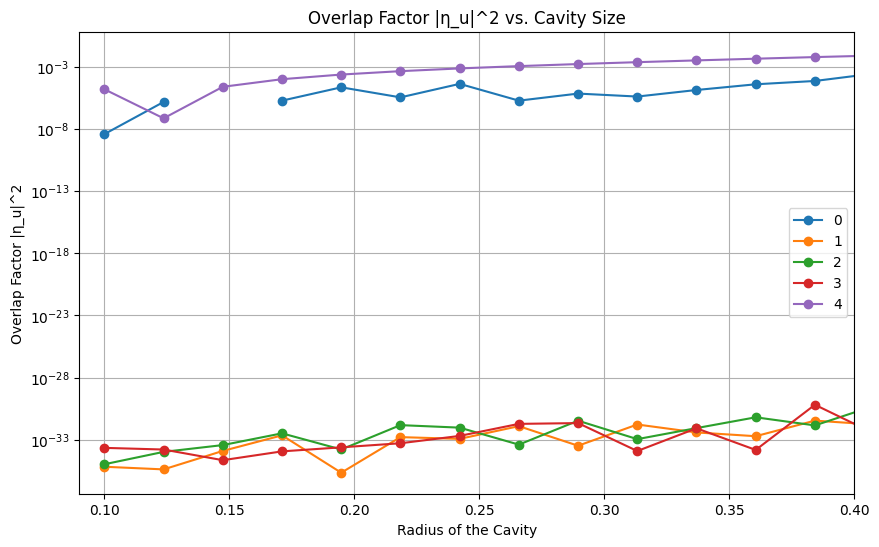

In [30]:
# Plotting
plt.figure(figsize=(10, 6))
print(eta_u_values.shape)
for i, eta_us in enumerate(eta_u_values.transpose()):
    plt.plot(radii_values, eta_us, marker='o', label=str(i))
plt.legend()
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xlabel('Radius of the Cavity')
plt.ylabel('Overlap Factor |η_u|^2')
plt.xlim([0.09, 0.4])
#plt.ylabel('Overlap Factor |η_u|')
plt.title('Overlap Factor |η_u|^2 vs. Cavity Size')
plt.grid(True)
plt.show()

## Optimizing the Cavity's Overlap Factor Using Autograd


Here’s how you can structure the markdown documentation for the section that covers the optimization of the cavity's overlap factor using Autograd and the Adam optimizer:

Optimizing the Cavity's Overlap Factor Using Autograd
To further enhance the interaction between the guided modes and the photonic crystal, we perform an optimization of the cavity's overlap factor
𝜂𝑢
. By leveraging the automatic differentiation capabilities of the Autograd library and the Adam optimizer, we aim to maximize
𝜂𝑢 by fine-tuning the cavity's parameters, such as the position offsets in the x and y directions.

### Objective Function (of_eta):
The function computes the overlap factor for the cavity given the current parameters (dx, dy) that control the position of the cavity.
The goal is to maximize
𝜂𝑢, so the function returns the negative value of
𝜂𝑢 to work with minimization algorithms.

### Computing Gradients Using Autograd
To efficiently optimize the overlap factor, we utilize Autograd to compute the gradients of the objective function with respect to the cavity parameters.

### Gradient Calculation:
We compute the gradients of the objective function using Autograd (obj_grad) and compare it to a numerically computed gradient to validate the accuracy.
The relative difference between the gradients is calculated to ensure consistency.

### Optimizing the Overlap Factor with Adam
With the gradients available, we use the Adam optimizer, a popular gradient-based optimization algorithm, to adjust the cavity parameters and maximize 𝜂𝑢.

### Adam Optimization:
The Adam optimizer is initialized with the objective function of_eta, and the optimization is run for a specified number of epochs.
The optimizer adjusts the cavity parameters within the specified bounds to maximize 𝜂𝑢.

Plane waves used in the expansion = 13.
Number of reciprocal lattice vectors in the expansion: npw = 13
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.009    │ │█████████-----------│   47% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.004    │ │████----------------│   22% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.019    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes     ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 6 eigenmodes │ 0.455    │
└───────────────────────────────────────────────────────────────┴──────────┘

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    4% │
│ Creating GME matrix                                       │ 0.003    │ │█████---------------│   27% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.012    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
Autograd gradient (eta):  -0.0000, computed in 0.5643s
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.012    │ │█████████████-------│   68% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    2% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.003    │ │███-----------------│   18% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.018    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │███████-------------│   35% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │██████--------------│   33% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.003    │ │███-----------------│   18% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.017    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  [3.50808810e+02 7.39807509e-23 9.60049036e-09]
eta_u_scalar =  350.8088099206252
eta_u_scalar =  350.8088099206252
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.011    │ │█████████-----------│   48% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │█-------------------│    6% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.008    │ │███████-------------│   36% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.022    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.011    │ │███████████---------│   56% │
│ Inverse matrix of Fourier-space permittivity              │ 0.002    │ │█-------------------│    9% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.004    │ │████----------------│   22% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.020    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  370.64392156818815
eta_u_scalar =  370.64392156818815
Numerical gradient (eta): 1983511.1648, computed in 0.2260s
Relative difference (eta): 1.00e+00
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.010    │ │██████--------------│   33% │
│ Inverse matrix of Fourier-space permittivity              │ 0.009    │ │██████--------------│   31% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.004    │ │██------------------│   12% │
│ Creating GME matrix                                       │ 0.004    │ │██------------------│   12% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.029    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.009    │ │█████████-----------│   47% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │█-------------------│    5% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.006    │ │██████--------------│   33% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.019    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
Epoch:    1/  10 | Duration:   0.13 secs | Objective: -3.706439e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │████████------------│   44% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    5% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │█-------------------│    5% │
│ Creating GME matrix                                       │ 0.004    │ │█████---------------│   29% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.013    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.009    │ │████████------------│   44% │
│ Inverse matrix of Fourier-space permittivity              │ 0.002    │ │█-------------------│    8% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │█-------------------│    6% │
│ Creating GME matrix                                       │ 0.006    │ │█████---------------│   30% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.021    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
Epoch:    2/  10 | Duration:   0.12 secs | Objective: -3.706439e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.011    │ │█████████-----------│   46% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │████----------------│   21% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.005    │ │████----------------│   21% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.023    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.010    │ │█████████-----------│   47% │
│ Inverse matrix of Fourier-space permittivity              │ 0.004    │ │████----------------│   20% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.005    │ │████----------------│   22% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.022    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
eta_u_scalar =  Autograd ArrayBox with value 370.64392156818815
Epoch:    3/  10 | Duration:   0.14 secs | Objective: -3.706439e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.011    │ │███████-------------│   36% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │███-----------------│   17% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.010    │ │██████--------------│   33% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.030    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.013    │ │█████████-----------│   46% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │███-----------------│   16% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    5% │
│ Creating GME matrix                                       │ 0.007    │ │████----------------│   24% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.029    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.44872530e+02 8.66554184e-23 8.61538415e-09]
eta_u_scalar =  Autograd ArrayBox with value 344.8725301027046
eta_u_scalar =  Autograd ArrayBox with value 344.8725301027046
Epoch:    4/  10 | Duration:   0.16 secs | Objective: -3.448725e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.010    │ │████████------------│   43% │
│ Inverse matrix of Fourier-space permittivity              │ 0.004    │ │███-----------------│   15% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.008    │ │██████--------------│   32% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.024    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.014    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    2% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.007    │ │████----------------│   23% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.028    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [2.86434194e+02 1.15542828e-23 7.34117258e-09]
eta_u_scalar =  Autograd ArrayBox with value 286.43419385901717
eta_u_scalar =  Autograd ArrayBox with value 286.43419385901717
Epoch:    5/  10 | Duration:   0.16 secs | Objective: -2.864342e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.013    │ │██████████----------│   51% │
│ Inverse matrix of Fourier-space permittivity              │ 0.003    │ │█-------------------│   10% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.008    │ │█████---------------│   29% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.026    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.012    │ │████████------------│   42% │
│ Inverse matrix of Fourier-space permittivity              │ 0.003    │ │██------------------│   11% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.011    │ │███████-------------│   40% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.027    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [5.26213215e+02 8.26503852e-23 1.20458394e-08]
eta_u_scalar =  Autograd ArrayBox with value 526.2132148785829
eta_u_scalar =  Autograd ArrayBox with value 526.2132148785829
Epoch:    6/  10 | Duration:   0.16 secs | Objective: -5.262132e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.016    │ │█████████-----------│   45% │
│ Inverse matrix of Fourier-space permittivity              │ 0.010    │ │█████---------------│   29% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.007    │ │████----------------│   20% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.035    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.013    │ │█████████-----------│   46% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │███-----------------│   16% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.005    │ │███-----------------│   17% │
│ Creating GME matrix                                       │ 0.003    │ │██------------------│   12% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.028    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [4.20970572e+03 4.16430625e-21 9.78508353e-08]
eta_u_scalar =  Autograd ArrayBox with value 4209.705719030146
eta_u_scalar =  Autograd ArrayBox with value 4209.705719030146
Epoch:    7/  10 | Duration:   0.15 secs | Objective: -4.209706e+03
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.021    │ │█████████-----------│   46% │
│ Inverse matrix of Fourier-space permittivity              │ 0.003    │ │█-------------------│    7% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.006    │ │██------------------│   14% │
│ Creating GME matrix                                       │ 0.011    │ │████----------------│   25% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.045    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.008    │ │██████--------------│   35% │
│ Inverse matrix of Fourier-space permittivity              │ 0.004    │ │███-----------------│   19% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.009    │ │███████-------------│   37% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.023    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.20987052e+02 1.57681907e-23 7.99318764e-09]
eta_u_scalar =  Autograd ArrayBox with value 320.9870518370754
eta_u_scalar =  Autograd ArrayBox with value 320.9870518370754
Epoch:    8/  10 | Duration:   0.22 secs | Objective: -3.209871e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.017    │ │█████████-----------│   46% │
│ Inverse matrix of Fourier-space permittivity              │ 0.008    │ │████----------------│   23% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.007    │ │███-----------------│   19% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.037    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │████----------------│   24% │
│ Inverse matrix of Fourier-space permittivity              │ 0.007    │ │█████---------------│   27% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.008    │ │██████--------------│   31% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.027    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [5.26213215e+02 2.23769230e-23 1.15888649e-08]
eta_u_scalar =  Autograd ArrayBox with value 526.213214878126
eta_u_scalar =  Autograd ArrayBox with value 526.213214878126
Epoch:    9/  10 | Duration:   0.17 secs | Objective: -5.262132e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.011    │ │███████-------------│   38% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │███-----------------│   17% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.008    │ │█████---------------│   29% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.028    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.011    │ │███████-------------│   40% │
│ Inverse matrix of Fourier-space permittivity              │ 0.003    │ │██------------------│   11% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.011    │ │███████-------------│   39% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.029    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  Autograd ArrayBox with value [3.50808810e+02 2.88110090e-22 8.97800911e-09]
eta_u_scalar =  Autograd ArrayBox with value 350.8088099200027
eta_u_scalar =  Autograd ArrayBox with value 350.8088099200027
Epoch:   10/  10 | Duration:   0.16 secs | Objective: -3.508088e+02
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.011    │ │████████------------│   40% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │███-----------------│   17% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.009    │ │██████--------------│   33% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.028    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.009    │ │██████--------------│   35% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │███-----------------│   18% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.010    │ │███████-------------│   37% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.027    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  [3.50808810e+02 2.88110090e-22 8.97800911e-09]
eta_u_scalar =  350.8088099200027
Optimized eta_u:  350.8088099200027
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.009    │ │███████-------------│   37% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │████----------------│   21% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.008    │ │██████--------------│   32% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.024    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.009    │ │███████-------------│   39% │
│ Inverse matrix of Fourier-space permittivity              │ 0.002    │ │█-------------------│   10% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.009    │ │███████-------------│   39% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.023    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Cavity quality factor: 1904666762625148562958809300992.00


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 2 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 1.144    │ │██████████████------│   75% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.048    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 0.272    │ │███-----------------│   18% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 21 k-points   │ 1.526    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes


 Number of wavevectors = 21, number of frequencies = 4



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 2 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.722    │ │██████████████------│   73% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.010    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.166    │ │███-----------------│   17% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 21 k-points   │ 0.993    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

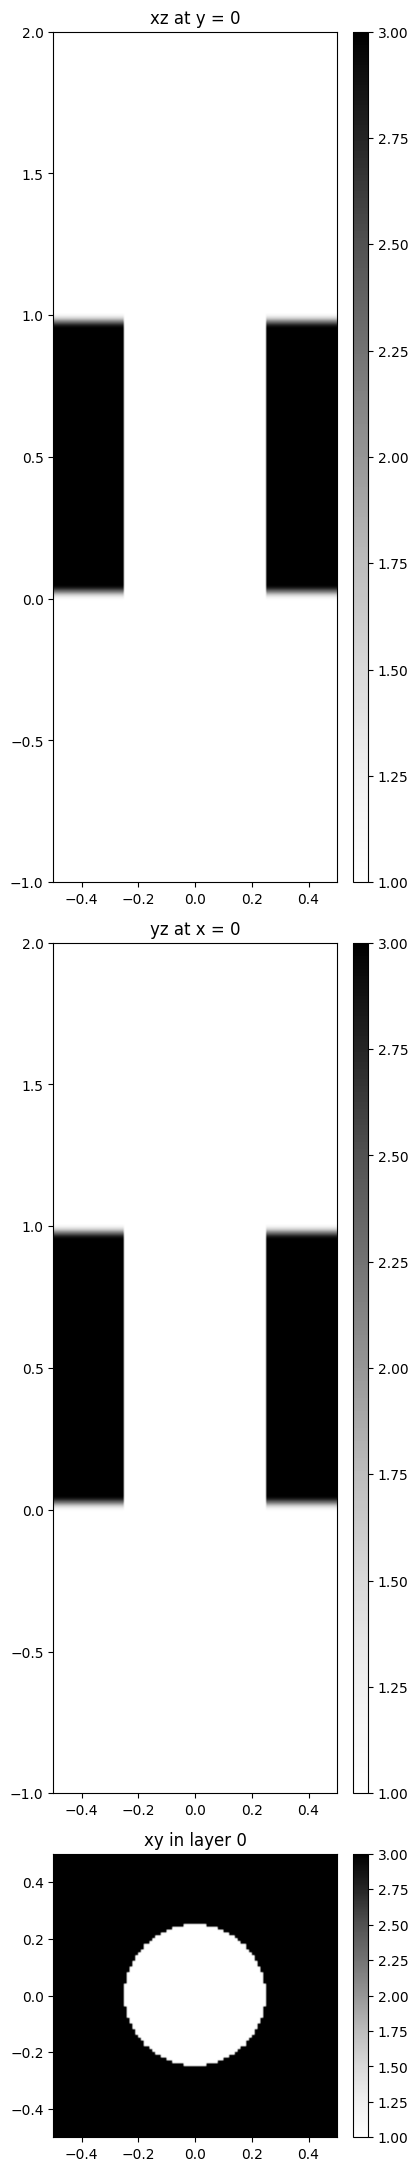

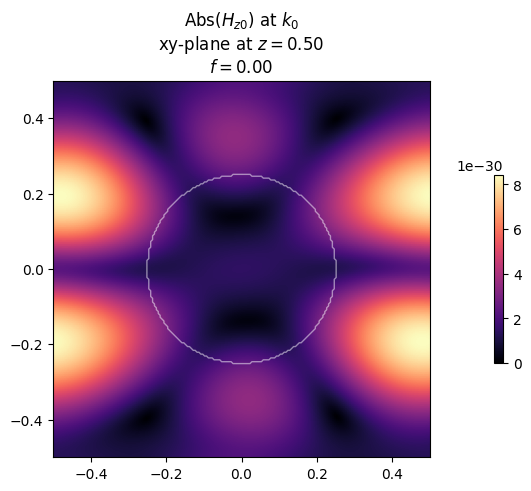

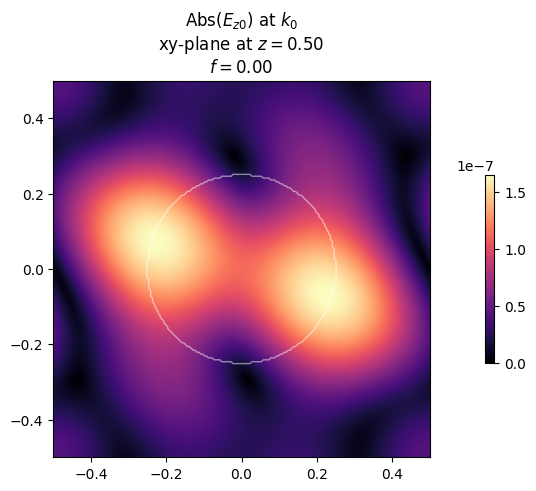

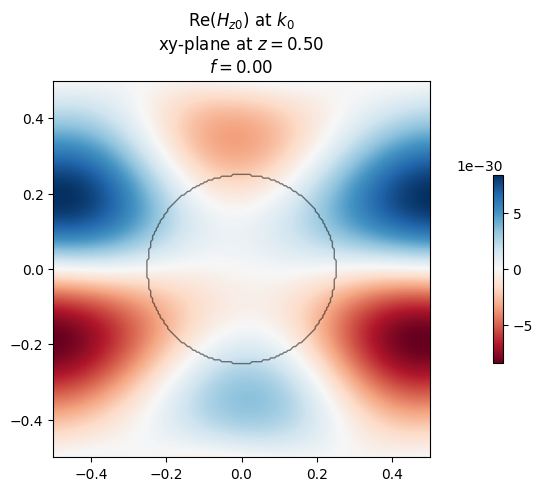

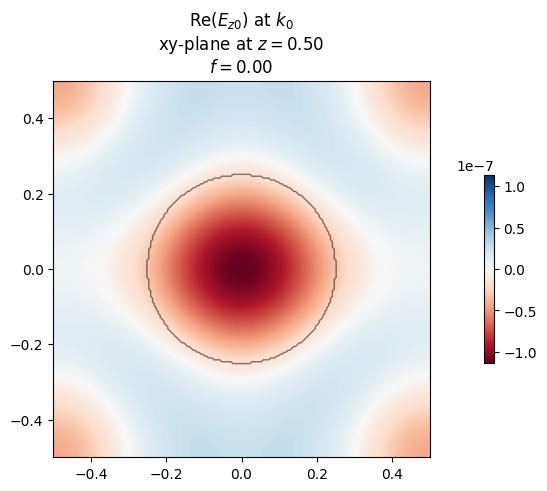

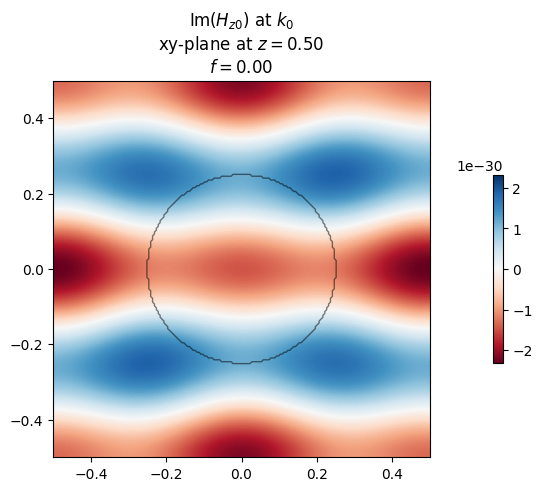

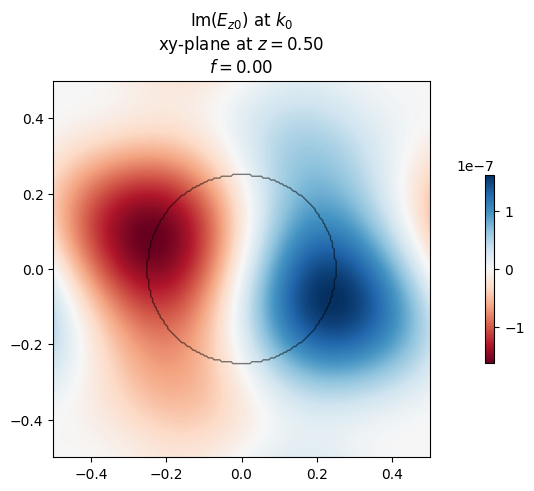

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │███-----------------│   20% │
│ Inverse matrix of Fourier-space permittivity              │ 0.016    │ │██████████----------│   53% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.003    │ │██------------------│   11% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.030    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.007    │ │██████--------------│   34% │
│ Inverse matrix of Fourier-space permittivity              │ 0.004    │ │███-----------------│   19% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.003    │ │███-----------------│   16% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.021    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

eta_u =  [3.70643922e+02 4.14176716e-23 8.37804376e-09]
eta_u_scalar =  370.64392156818815
R_ij: [0 0], term: (1-0j)
Single unit cell overlap factor eta_u: 370.64392156818815
Time-averaged overlap factor eta: 370.64392156818815


In [31]:

import matplotlib.pyplot as plt
import time
import autograd.numpy as np
from autograd import grad, value_and_grad
import legume
from legume.minimize import Minimize

# Define parameters
D, r, eps_c, eps_b = 1.0, 0.25, 1.0, 3
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))

a1, a2 = [Nx, 0], [0, Ny]
lattice = legume.Lattice(a1, a2)
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=r, x_cent=0., y_cent=0))
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
options = {'gmode_inds': [1], 'verbose': True, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')

def integral_E_j(num_layers, j, A_j, B_j, X_j, omega, eps_j, g, d_j, g_hat):

    N = num_layers - 1
    c = 1
    if j == 0:
        g_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = -c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
    elif j == N:
        g_hat_coef = c * 1j / (omega * eps_j * X_j) * ((A_j + B_j) * X_j)
        z_hat_coef = c * 1j / (omega * eps_j * X_j) * ((B_j - A_j) * g)
    else:
        g_hat_coef = -2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((B_j - A_j) * X_j)
        z_hat_coef = -2 * c / (omega * eps_j * X_j) * np.sin(X_j * d_j / 2) * ((A_j + B_j) * g)
    return (np.array([g_hat_coef * g_hat[0], g_hat_coef * g_hat[1], z_hat_coef]))

def cavity(dx, dy, radius):
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=D, eps_b=eps_b)
    phc.add_shape(legume.Circle(eps=eps_c, x_cent=xc + dx[0], y_cent=yc + dy[0], r=radius))

    # Run the GME simulation for visualization
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    plt.show()

    return phc

def gme_cavity(dx, dy, radius, gmax, truncate_g, options):
    phc = cavity(dx, dy, radius)
    options['compute_im'] = False
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)
    return (gme)

def of_Q(params):
    dx = params[:nc]
    dy = params[nc:]
    gme = gme_cavity(dx, dy, radius=0.25, gmax=gmax, truncate_g=truncate_g, options=options)
    try:
        freq_im, _, _ = gme.compute_rad(0, [Nx * Ny])
        Q = gme.freqs[0, Nx * Ny] / 2 / freq_im[0]
    except ValueError:
        Q = 0
    return -Q

def calculate_overlap_factor(gme, mind):
    kind = 0
    k = gme.kpoints[:, kind]
    kx, ky = k[0], k[1]
    gkx = gme.gvec[0, :] + kx + gme.delta_gx
    gky = gme.gvec[1, :] + ky
    gk = np.sqrt(np.square(gkx) + np.square(gky))
    # Unit vectors in the propagation direction; we add a tiny component
    # in the x-direction to avoid problems at gk = 0
    # analogous to ghat in the legume paper
    pkx = gkx / gk
    pky = gky / gk

    # Get the coefficients for the TM mode
    omega = gme.freqs[kind][mind] * 2 * np.pi
    evec = gme.eigvecs[kind][:, mind]
    num_layers = gme.eps_array.size
    total_integral = 0.
    for lind in range(num_layers):
        eps_j = gme.eps_array[lind]

        # Index of the |G|=0 reciprocal lattice vector
        zero_G_index = gk.argmin()

        if lind == 0 or lind == num_layers - 1:
            d_j = np.inf
        else:
            d_j = gme.d_array[lind - 1]
        count = 0
        for im1 in range(gme.gmode_include[kind].size):

            mode1 = gme.gmode_include[kind][im1]
            (indmode, oms, As, Bs, chis) = gme._get_guided(gk, kind, mode1)

            if mode1 % 2 == 0:
                print("UH OH TE MODE")

            g_hat = np.array([pkx[indmode], pky[indmode]])
            g_norm = gk[indmode]
            # the quantity below should be equal to the the x-y integral of Exp[i G rho]epsbar(z)/eps(x,y,z)
            inv_eps_ft_at_G = gme.phc.lattice.ec_area * eps_j * gme.eps_inv_mat[lind][indmode, zero_G_index]

            res = integral_E_j(num_layers, lind, As[lind, :], Bs[lind, :], chis[lind, :], omega, eps_j, g_norm, d_j,
                               g_hat)
            vals = evec[count:count + gme.modes_numg[kind][im1]] / np.sqrt(gme.phc.lattice.ec_area)
            total_integral += np.array([np.abs(np.dot(vals, inv_eps_ft_at_G * Ej_integral)) for Ej_integral in res])
            count += gme.modes_numg[kind][im1]

    V_u = D * gme.phc.lattice.ec_area
    eta_u = total_integral / np.sqrt(V_u)
    print("eta_u = ", eta_u)
    eta_u_scalar = np.sum(eta_u)  # Ensure eta_u is a scalar
    print("eta_u_scalar = ", eta_u_scalar)
    return eta_u_scalar

def generate_eta_u_vs_radius_graph(radii):
    eta_u_values = []
    for radius in radii:
        gme = gme_cavity(dx, dy, radius, gmax=gmax, truncate_g=truncate_g, options=options)
        eta_u = np.array([np.abs(calculate_overlap_factor(gme, m)[2]) for m in range(5)])
        eta_u_values.append(eta_u)
    return np.array(eta_u_values)

def of_eta(params):
    dx = params[:nc]
    dy = params[nc:]
    gme = gme_cavity(dx, dy, radius=0.25, gmax=gmax, truncate_g=truncate_g, options=options)
    eta_u_scalar = calculate_overlap_factor(gme, 0)  # Assuming we optimize for the first mode
    print("eta_u_scalar = ", eta_u_scalar)
    return -np.abs((eta_u_scalar))  # Optimize eta_u_scalar

# Initialize starting parameters
pstart = np.zeros((2 * nc,))

# Compute gradients using autograd for eta
legume.set_backend('autograd')
obj_grad = value_and_grad(of_eta)
ind0 = 0
t = time.time()
grad_a_eta = obj_grad(pstart)[1]
print("Autograd gradient (eta):  %1.4f, computed in %1.4fs" % (grad_a_eta[ind0], time.time() - t))

t = time.time()
p_test = np.copy(pstart)
p_test[ind0] += 1e-5
grad_n_eta = (of_eta(p_test) - of_eta(pstart)) / 1e-5
print("Numerical gradient (eta): %1.4f, computed in %1.4fs" % (grad_n_eta, time.time() - t))
print("Relative difference (eta): %1.2e" % np.abs((grad_a_eta[ind0] - grad_n_eta) / grad_n_eta))

# Optimize eta using Adam
opt_eta = Minimize(of_eta)
(p_opt_eta, ofs_eta) = opt_eta.adam(pstart, step_size=0.005, Nepochs=10, bounds=[-0.25, 0.25])
dx_eta, dy_eta = p_opt_eta[:nc], p_opt_eta[nc:]

# Run the final simulation for the optimized parameters for eta
gme_opt_eta = gme_cavity(dx_eta, dy_eta, radius=0.25, gmax=gmax, truncate_g=truncate_g, options=options)
eta_u_opt = calculate_overlap_factor(gme_opt_eta, 0)
print("Optimized eta_u: ", eta_u_opt)

# Initialize GME and run the simulation
path = lattice.bz_path([[0, 0], [np.pi, np.pi]], [20])
gme = gme_cavity(dx, dy, radius=0.25, gmax=gmax, truncate_g=truncate_g, options=options)
freq_im, _, _ = gme.compute_rad(0, [Nx * Ny])
Q = gme.freqs[0, Nx * Ny] / 2 / freq_im[0]
print("Cavity quality factor: %1.2f" % Q)

gme.run(kpoints=path['kpoints'], gmode_inds=[0, 3], numeig=4, verbose=True, compute_im=False)
freqs_xyeven = gme.freqs
print(f'\n Number of wavevectors = {freqs_xyeven.shape[0]}, number of frequencies = {freqs_xyeven.shape[1]}\n')

gme.run(kpoints=path['kpoints'], gmode_inds=[1, 2], numeig=4, verbose=True, compute_im=False)
freqs_xyodd = gme.freqs
X0, X = legume.viz.calculate_x(path["kpoints"], 4, k_units=True)

legume.viz.structure(phc, xz=True, xy=True, yz=True, figsize=4)
plt.show()

# Visualize the fields
ax = legume.viz.field(gme, 'h', 0, 0, z=D / 2, component='z', val='abs', N1=200, N2=200)
ax = legume.viz.field(gme, 'e', 0, 0, z=D / 2, component='z', val='abs', N1=200, N2=200)
ax = legume.viz.field(gme, 'h', 0, 0, z=D / 2, component='z', val='re', N1=200, N2=200)
ax = legume.viz.field(gme, 'e', 0, 0, z=D / 2, component='z', val='re', N1=200, N2=200)
ax = legume.viz.field(gme, 'h', 0, 0, z=D / 2, component='z', val='im', N1=200, N2=200)
ax = legume.viz.field(gme, 'e', 0, 0, z=D / 2, component='z', val='im', N1=200, N2=200)
plt.show()

def time_average_overlap_factor(eta_u, K, Nx, Ny):
    N_u = Nx * Ny
    sum_ij = 0.0
    for i in range(Nx):
        for j in range(Ny):
            for k in range(Nx):
                for l in range(Ny):
                    R_ij = np.array([i - k, j - l])
                    term = np.exp(-1j * np.dot(K, R_ij))
                    sum_ij += term
                    print(f"R_ij: {R_ij}, term: {term}")
    eta = np.abs(eta_u)**2 * (1 / N_u**2) * np.real(sum_ij)
    return np.sqrt(np.real(eta))

K = np.array([0, 0])
gme = gme_cavity(dx, dy, radius=0.25, gmax=gmax, truncate_g=truncate_g, options=options)
eta_u = calculate_overlap_factor(gme, 0)
eta = time_average_overlap_factor(eta_u, K, Nx, Ny)
print("Single unit cell overlap factor eta_u:", eta_u)
print("Time-averaged overlap factor eta:", eta)


## Results of the Optimization
The optimized overlap factor 𝜂𝑢
and the corresponding field distributions provide valuable insights into the effectiveness of the cavity design. By maximizing 𝜂𝑢, we enhance the interaction between the guided modes and the photonic crystal, which is crucial for applications such as dark matter detection.

This optimization process demonstrates the power of combining advanced computational tools like Autograd with photonic crystal simulations to achieve highly optimized designs tailored to specific scientific and technological goals.

## Introduction of a fancy shape and optimizaton

### imports needed as the kernel might disconnect

In [32]:
!pip install legume-gme
import matplotlib.pyplot as plt
import time

import autograd.numpy as np
from autograd import grad, value_and_grad

import legume
from legume.minimize import Minimize
from legume.utils import grad_num


### Define a PhC with a "daisy" hole shape.

Number of reciprocal lattice vectors in the expansion: npw = 13
Plane waves used in the expansion = 13.


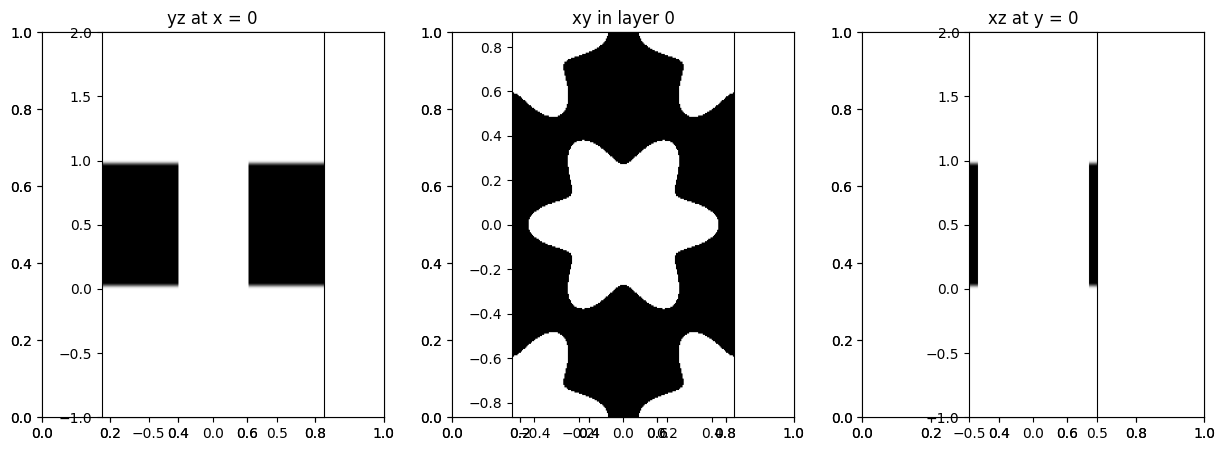

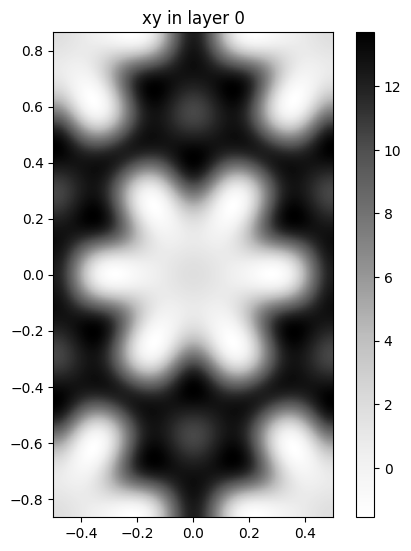

In [36]:

D, r, eps_c, eps_b,c,numeig = 1, 0.25, 1.0, 12, 1, 10
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
lattice = legume.Lattice('hexagonal')
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')
def daisy_phc(d, r0, rd):
    """
    d: slab thikcness
    r0, rd: base radius and radius modulation as defined in the paper
    """
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=d, eps_b=12)

    # We implement the daisy as a FourierShape class
    f_as = np.array([2*r0, 0, 0, 0, 0, 0, rd])
    daisy = legume.FourierShape(x_cent=0, y_cent=0, f_as=f_as)
    phc.add_shape(daisy)
    return phc

phc = daisy_phc(1.0, 0.35, 0.08)    # parameters of the paper
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
# We can have a look at the structure as defined and obtained from an inverse FT
# Function to plot the structure from different views side by side
def plot_structure_side_by_side(phc):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    gs = fig.add_gridspec(1, 3)

    # Plot yz view
    ax1 = fig.add_subplot(gs[0])
    legume.viz.structure(phc, yz=True, xy=False, xz=False, fig=fig, gridspec=gs[0],cbar=False,Nx=200, Ny=300)


    # Plot xy view
    ax2 = fig.add_subplot(gs[1])
    legume.viz.structure(phc, yz=False, xy=True, xz=False, fig=fig, gridspec=gs[1],cbar=False,Nx=200, Ny=300)


    # Plot xz view
    ax3 = fig.add_subplot(gs[2])
    legume.viz.structure(phc, yz=False, xy=False, xz=True, fig=fig, gridspec=gs[2],cbar=False,Nx=200, Ny=300)


# Example usage with your photonic crystal object
plot_structure_side_by_side(phc)
legume.viz.eps_ft(gme, cbar=True, Nx=200, Ny=300)





### Initialization and running GME for daisy PHC

K-points path: [[3.14159265 2.98451302 2.82743339 2.67035376 2.51327412 2.35619449
  2.19911486 2.04203522 1.88495559 1.72787596 1.57079633 1.41371669
  1.25663706 1.09955743 0.9424778  0.78539816 0.62831853 0.4712389
  0.31415927 0.15707963 0.         0.16755161 0.33510322 0.50265482
  0.67020643 0.83775804 1.00530965 1.17286126 1.34041287 1.50796447
  1.67551608 1.84306769 2.0106193  2.17817091 2.34572251 2.51327412
  2.68082573 2.84837734 3.01592895 3.18348056 3.35103216 3.51858377
  3.68613538 3.85368699 4.0212386  4.1887902 ]
 [1.81379936 1.7231094  1.63241943 1.54172946 1.45103949 1.36034952
  1.26965955 1.17896959 1.08827962 0.99758965 0.90689968 0.81620971
  0.72551975 0.63482978 0.54413981 0.45344984 0.36275987 0.2720699
  0.18137994 0.09068997 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.     

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 2.192    │ │█████████-----------│   47% │
│ Inverse matrix of Fourier-space permittivity              │ 0.002    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.099    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 2.146    │ │█████████-----------│   46% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 46 k-points   │ 4.640    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 6 guided modes       ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 460 eigenmodes │ 8.216    │
└─────────────────────────────────────────────────────────────────┴──────────┘

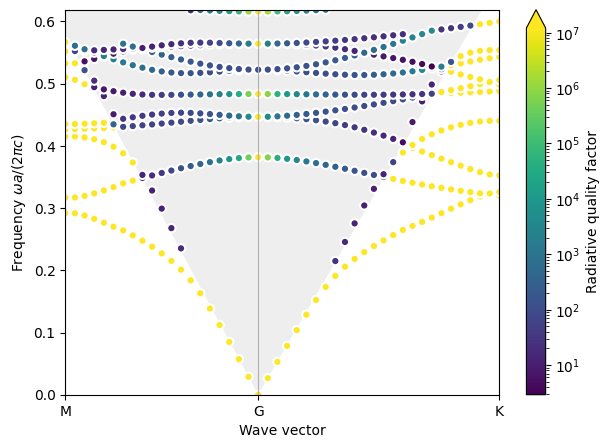

In [37]:

path = lattice.bz_path(['M', 'G', 'K'], [20, 25])
print("K-points path:", path['kpoints'])
options = {'gmode_inds': [1,3,5,7,9,11],  # Take only the modes with H in the xy-plane
           'numeig': 10,
           'verbose': True
           }
npw = np.shape(gme.gvec)[1]  # Number of plane waves in the expansion
print(f'Number of reciprocal lattice vectors in the expansion: npw = {npw}')
gme.run(kpoints=path['kpoints'], **options)

def plot_bands(gme):
    fig, ax = plt.subplots(1, figsize = (7, 5))
    legume.viz.bands(gme, Q=True, ax=ax)
    ax.set_xticks(path['indexes'])
    ax.set_xticklabels(path['labels'])
    ax.xaxis.grid('True')


plot_bands(gme)

### Picking up optimal parameters

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 1.028    │ │██████████----------│   52% │
│ Inverse matrix of Fourier-space permittivity              │ 0.002    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.031    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.817    │ │████████------------│   42% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 46 k-points   │ 1.963    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 6 guided modes       ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 460 eigenmodes │ 7.079    │
└─────────────────────────────────────────────────────────────────┴──────────┘

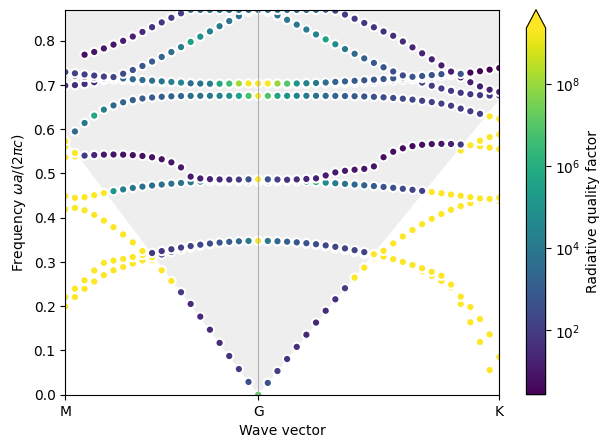

In [38]:
phc = daisy_phc(1.0, 0.5, 0.1)
gme = legume.GuidedModeExp(phc, gmax=2)
gme.run(kpoints=path['kpoints'], **options)
plot_bands(gme)

### Test gradient
 Objective function is the difference in frequency between modes 1 and 3

 Mode 2 is by symmetry degenerate with either 1 or 3

In [39]:

legume.set_backend('autograd')


def of_daisy(params):
    d = params[0]
    r0 = params[1]
    rd = params[2]

    phc = daisy_phc(d, r0, rd)
    gme = legume.GuidedModeExp(phc, gmax=5)
    gme.run(kpoints=np.array([[0], [0]]), **options)

    return gme.freqs[0, 3] - gme.freqs[0, 1]

pstart = np.array([1.0, 0.5, 0.])
obj_grad = value_and_grad(of_daisy)

# Compute the autograd gradients (NB: all at once!)
grad_a = obj_grad(pstart)[1]
print("Autograd gradient w.r.t. d, r0, rd:   ", grad_a)

# Compute a numerical gradient
grad_n = grad_num(of_daisy, pstart)
print("Numerical gradient w.r.t. d, r0, rd:  ", grad_n)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.698    │ │████████------------│   42% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.066    │ │--------------------│    4% │
│ Creating GME matrix                                       │ 0.905    │ │██████████----------│   54% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 1.673    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.142    │
└────────────────────────────────────────────────────────────────┴──────────┘

Autograd gradient w.r.t. d, r0, rd:    [ 0.04592374 -1.8973288   0.6859678 ]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.047    │ │███-----------------│   19% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.071    │ │█████---------------│   29% │
│ Creating GME matrix                                       │ 0.124    │ │██████████----------│   50% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.248    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 0.341    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.086    │ │████----------------│   23% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.118    │ │██████--------------│   31% │
│ Creating GME matrix                                       │ 0.171    │ │████████------------│   45% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.381    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 0.421    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.107    │ │█████---------------│   29% │
│ Inverse matrix of Fourier-space permittivity              │ 0.002    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.110    │ │█████---------------│   29% │
│ Creating GME matrix                                       │ 0.152    │ │████████------------│   41% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.373    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 0.454    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.069    │ │███-----------------│   17% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.134    │ │██████--------------│   34% │
│ Creating GME matrix                                       │ 0.193    │ │█████████-----------│   48% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.400    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 0.423    │
└────────────────────────────────────────────────────────────────┴──────────┘

Numerical gradient w.r.t. d, r0, rd:   [ 0.04568201 -1.87460113  0.68596208]


### Optimization of circular holes

In [40]:
def of_d_r(params):
    p_daisy = np.array(list(params) + [0.])
    return of_daisy(p_daisy)

opt = Minimize(of_d_r)

# Starting parameters d and r0
pstart = np.array([1.0, 0.5])
# Bounds on the parameters
bounds=[(0.1, 1), (0.1, 0.45)]

# Run an 'lbfgs' optimization
(p_opt, ofs) = opt.lbfgs(pstart, Nepochs=10, bounds=bounds)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.086    │ │████----------------│   22% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │--------------------│    1% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.116    │ │██████--------------│   30% │
│ Creating GME matrix                                       │ 0.174    │ │█████████-----------│   45% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.384    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 0.304    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.423    │ │███████-------------│   37% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.072    │ │█-------------------│    6% │
│ Creating GME matrix                                       │ 0.631    │ │███████████---------│   56% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 1.129    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.038    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.733    │ │████████------------│   43% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.078    │ │--------------------│    5% │
│ Creating GME matrix                                       │ 0.870    │ │██████████----------│   52% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 1.689    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 5.167    │
└────────────────────────────────────────────────────────────────┴──────────┘

Epoch:    1/  10 | Duration:  14.34 secs | Objective: 3.043585e-04


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.417    │ │█████████-----------│   47% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.082    │ │█-------------------│    9% │
│ Creating GME matrix                                       │ 0.387    │ │████████------------│   44% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.890    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.222    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.450    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.082    │ │█-------------------│    9% │
│ Creating GME matrix                                       │ 0.388    │ │████████------------│   42% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.923    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.596    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.444    │ │██████--------------│   31% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.079    │ │█-------------------│    5% │
│ Creating GME matrix                                       │ 0.923    │ │████████████--------│   64% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 1.453    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.274    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.403    │ │█████████-----------│   46% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │--------------------│    1% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.078    │ │█-------------------│    9% │
│ Creating GME matrix                                       │ 0.379    │ │████████------------│   44% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.867    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.772    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.441    │ │██████--------------│   31% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.085    │ │█-------------------│    6% │
│ Creating GME matrix                                       │ 0.903    │ │████████████--------│   63% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 1.432    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.453    │
└────────────────────────────────────────────────────────────────┴──────────┘

Epoch:    2/  10 | Duration:  32.27 secs | Objective: 2.963428e-04


### Print optimal parameters and visualize PhC bands

Optimal parameters found are d = 1.00, r0 = 0.10
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 2.890    │ │██████████----------│   53% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.172    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 2.225    │ │████████------------│   41% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 46 k-points   │ 5.467    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 6 guided modes       ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 460 eigenmodes │ 7.225    │
└─────────────────────────────────────────────────────────────────┴──────────┘

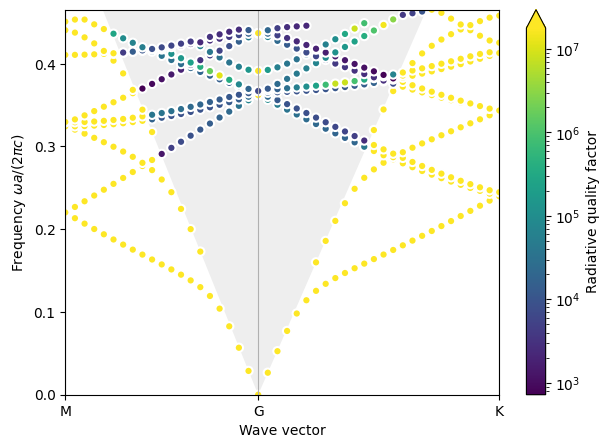

In [41]:

print("Optimal parameters found are d = %1.2f, r0 = %1.2f" %(p_opt[0], p_opt[1]))
phc = daisy_phc(p_opt[0], p_opt[1], 0.0)
gme = legume.GuidedModeExp(phc, gmax=2)
gme.run(kpoints=path['kpoints'], **options)
plot_bands(gme)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.052    │ │████----------------│   20% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.086    │ │██████--------------│   34% │
│ Creating GME matrix                                       │ 0.114    │ │████████------------│   45% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.256    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 0.253    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.370    │ │█████████-----------│   46% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.077    │ │█-------------------│   10% │
│ Creating GME matrix                                       │ 0.349    │ │████████------------│   44% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.800    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.692    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.409    │ │█████---------------│   30% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.078    │ │█-------------------│    6% │
│ Creating GME matrix                                       │ 0.875    │ │████████████--------│   64% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 1.365    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.386    │
└────────────────────────────────────────────────────────────────┴──────────┘

Epoch:    1/  10 | Duration:  13.34 secs | Objective: 6.553356e-04


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.436    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.082    │ │█-------------------│    9% │
│ Creating GME matrix                                       │ 0.370    │ │████████------------│   42% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.890    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 5.251    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.478    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.083    │ │█-------------------│    8% │
│ Creating GME matrix                                       │ 0.413    │ │████████------------│   42% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.980    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 3.608    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.654    │ │████████------------│   41% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.099    │ │█-------------------│    6% │
│ Creating GME matrix                                       │ 0.840    │ │██████████----------│   53% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 1.596    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 5.289    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.425    │ │█████████-----------│   48% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.085    │ │█-------------------│    9% │
│ Creating GME matrix                                       │ 0.378    │ │████████------------│   42% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.892    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.415    │
└────────────────────────────────────────────────────────────────┴──────────┘

Epoch:    2/  10 | Duration:  26.09 secs | Objective: 6.194574e-04
Optimal parameters found are d = 0.60, r0 = 0.10
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 2.775    │ │██████████----------│   52% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.155    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 2.217    │ │████████------------│   42% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 46 k-points   │ 5.290    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 6 guided modes       ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 460 eigenmodes │ 7.373    │
└─────────────────────────────────────────────────────────────────┴──────────┘

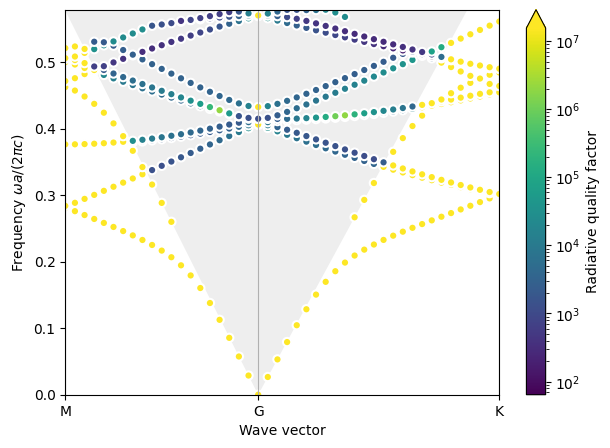

In [42]:
bounds=[(0.4, 0.6), (0.1, 0.45)]
(p_opt, ofs) = opt.lbfgs(pstart, Nepochs=10, bounds=bounds)
print("Optimal parameters found are d = %1.2f, r0 = %1.2f" %(p_opt[0], p_opt[1]))
phc = daisy_phc(p_opt[0], p_opt[1], 0.0)
gme = legume.GuidedModeExp(phc, gmax=2)
gme.run(kpoints=path['kpoints'], **options)
plot_bands(gme)

### This time include all three parameters

In [44]:

opt = Minimize(of_daisy)
pstart = np.array([1.0, 0.4, 0.])
bounds=[(0.4, 0.6), (0.3, 0.45), (-0.1, 0.1)]

(p_opt, ofs) = opt.lbfgs(pstart, Nepochs=10, bounds=bounds)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.072    │ │█████---------------│   26% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.084    │ │█████---------------│   30% │
│ Creating GME matrix                                       │ 0.121    │ │████████------------│   43% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.283    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 0.305    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.449    │ │█████████-----------│   49% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.079    │ │█-------------------│    9% │
│ Creating GME matrix                                       │ 0.380    │ │████████------------│   42% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.914    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.326    │
└────────────────────────────────────────────────────────────────┴──────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.381    │ │██████--------------│   34% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.072    │ │█-------------------│    6% │
│ Creating GME matrix                                       │ 0.651    │ │███████████---------│   59% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 1.107    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 61 plane waves and 6 guided modes      ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 10 eigenmodes │ 4.685    │
└────────────────────────────────────────────────────────────────┴──────────┘

Epoch:    1/  10 | Duration:  13.38 secs | Objective: 3.622172e-02


Optimal parameters found are d = 0.60, r0 = 0.30, rd = -0.10
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 6 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 2.742    │ │██████████----------│   52% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.142    │ │--------------------│    3% │
│ Creating GME matrix                                       │ 2.233    │ │████████------------│   42% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 46 k-points   │ 5.287    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 6 guided modes       ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 460 eigenmodes │ 7.152    │
└─────────────────────────────────────────────────────────────────┴──────────┘

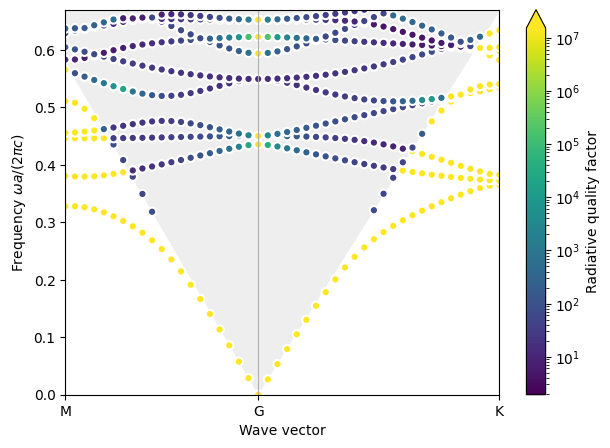

In [45]:
print("Optimal parameters found are d = %1.2f, r0 = %1.2f, rd = %1.2f" %(p_opt[0], p_opt[1], p_opt[2]))
phc = daisy_phc(p_opt[0], p_opt[1], p_opt[2])
gme = legume.GuidedModeExp(phc, gmax=2)
gme.run(kpoints=path['kpoints'], **options)
plot_bands(gme)


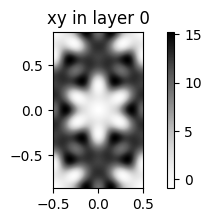

In [46]:
legume.viz.eps_ft(gme, figsize=2., cbar=True, Nx=200, Ny=300)

## Optimizing the Overlap Factor for a Daisy-Shaped Photonic Crystal Cavity.

In this section, we will optimize the overlap factor 𝜂𝑢 for a daisy-shaped photonic crystal cavity. The overlap factor is a crucial parameter in photonic crystal designs, as it quantifies how well the electromagnetic field within the cavity matches the desired mode profile. Maximizing this factor can lead to improved confinement and efficiency of the photonic crystal cavity.

### Step 1: Define Parameters and Lattice Structure

We begin by defining the necessary parameters for our photonic crystal. This includes the slab thickness, base radius, radius modulation, and the permittivities of the materials used.

In [49]:
import matplotlib.pyplot as plt
import time
import autograd.numpy as np
from autograd import grad, value_and_grad
import legume
from legume.minimize import Minimize

# Define parameters
D, r, eps_c, eps_b = 1.0, 0.25, 1.0, 12
eps_lower, eps_upper, gmax, truncate_g = 1.0, 1.0, 2, 'abs'
Nx, Ny, xc, yc, nc = 1, 1, 0.0, 0.0, 1
dx, dy = np.zeros((nc,)), np.zeros((nc,))

We set up a hexagonal lattice for the photonic crystal and define the initial structure with a circular shape in the slab.

In [50]:
lattice = legume.Lattice('hexagonal')
phc = legume.PhotCryst(lattice, eps_l=eps_lower, eps_u=eps_upper)
phc.add_layer(d=D, eps_b=eps_b)
phc.layers[-1].add_shape(legume.Circle(eps=eps_c, r=r, x_cent=0., y_cent=0))
gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
options = {'gmode_inds': [1], 'verbose': True, 'numeig': Nx * Ny + 5, 'gradients': 'approx'}
print(f'Number of reciprocal lattice vectors in the expansion: npw = {np.shape(gme.gvec)[1]}')


Plane waves used in the expansion = 13.
Number of reciprocal lattice vectors in the expansion: npw = 13


### Step 2: Define the Daisy-Shaped Photonic Crystal
The daisy shape is implemented using Fourier coefficients to describe the modulation of the radius. This shape is used to define the photonic crystal.

In [51]:
def daisy_phc(d, r0, rd):
    """
    d: slab thickness
    r0, rd: base radius and radius modulation as defined in the paper
    """
    phc = legume.PhotCryst(lattice)
    phc.add_layer(d=d, eps_b=12)

    # We implement the daisy as a FourierShape class
    f_as = np.array([2*r0, 0, 0, 0, 0, 0, rd])
    daisy = legume.FourierShape(x_cent=0, y_cent=0, f_as=f_as)
    phc.add_shape(daisy)
    return phc


Step 3: Calculate the Overlap Factor 𝜂𝑢

We define a function that computes the overlap factor 𝜂𝑢 for the given photonic crystal structure. This function evaluates how well the electromagnetic field matches the desired mode within the cavity.

In [52]:
def calculate_overlap_factor(gme, mind):
    kind = 0
    k = gme.kpoints[:, kind]
    kx, ky = k[0], k[1]
    gkx = gme.gvec[0, :] + kx + gme.delta_gx
    gky = gme.gvec[1, :] + ky
    gk = np.sqrt(np.square(gkx) + np.square(gky))
    pkx = gkx / gk
    pky = gky / gk

    omega = gme.freqs[kind][mind] * 2 * np.pi
    evec = gme.eigvecs[kind][:, mind]
    num_layers = gme.eps_array.size
    total_integral = 0.
    for lind in range(num_layers):
        eps_j = gme.eps_array[lind]
        zero_G_index = gk.argmin()

        if lind == 0 or lind == num_layers - 1:
            d_j = np.inf
        else:
            d_j = gme.d_array[lind - 1]
        count = 0
        for im1 in range(gme.gmode_include[kind].size):
            mode1 = gme.gmode_include[kind][im1]
            (indmode, oms, As, Bs, chis) = gme._get_guided(gk, kind, mode1)

            g_hat = np.array([pkx[indmode], pky[indmode]])
            g_norm = gk[indmode]
            inv_eps_ft_at_G = gme.phc.lattice.ec_area * eps_j * gme.eps_inv_mat[lind][indmode, zero_G_index]

            res = integral_E_j(num_layers, lind, As[lind, :], Bs[lind, :], chis[lind, :], omega, eps_j, g_norm, d_j, g_hat)
            vals = evec[count:count + gme.modes_numg[kind][im1]] / np.sqrt(gme.phc.lattice.ec_area)
            total_integral += np.array([np.abs(np.dot(vals, inv_eps_ft_at_G * Ej_integral)) for Ej_integral in res])
            count += gme.modes_numg[kind][im1]

    V_u = D * gme.phc.lattice.ec_area
    eta_u = total_integral / np.sqrt(V_u)
    eta_u_scalar = np.sum(eta_u)  # Ensure eta_u is a scalar
    return eta_u_scalar


### Step 4: Define the Objective Function for Optimization

We define a new objective function of_eta_daisy that computes the overlap factor for the daisy structure and returns its negative value. This function will be used by the optimizer to maximize 𝜂𝑢.

In [53]:
def of_eta_daisy(params):
    d = params[0]
    r0 = params[1]
    rd = params[2]

    phc = daisy_phc(d, r0, rd)
    gme = legume.GuidedModeExp(phc, gmax=gmax, truncate_g=truncate_g)
    gme.run(kpoints=np.array([[0], [0]]), **options)

    eta_u_scalar = calculate_overlap_factor(gme, 0)  # Assuming we optimize for the first mode
    return -np.abs(eta_u_scalar)  # Minimize the negative of eta_u_scalar


### Step 5: Optimize the Daisy Structure to Maximize 𝜂𝑢

We initialize the optimization process using the lbfgs method to find the best parameters (d, r0, rd) that maximize the overlap factor 𝜂𝑢.

In [54]:
# Initial parameters for the daisy structure
pstart = np.array([1.0, 0.5, 0.0])

# Set up the optimization for eta_u
legume.set_backend('autograd')
obj_grad = value_and_grad(of_eta_daisy)

# Compute the autograd gradients
grad_a_eta = obj_grad(pstart)[1]
print("Autograd gradient w.r.t. d, r0, rd:   ", grad_a_eta)

# Optimize eta_u using lbfgs
opt_eta = Minimize(of_eta_daisy)
bounds = [(0.4, 0.6), (0.1, 0.45), (-0.1, 0.1)]
(p_opt_eta, ofs_eta) = opt_eta.lbfgs(pstart, Nepochs=10, bounds=bounds)

print("Optimal parameters found are d = %1.2f, r0 = %1.2f, rd = %1.2f" % (p_opt_eta[0], p_opt_eta[1], p_opt_eta[2]))


Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.006    │ │███████-------------│   37% │
│ Inverse matrix of Fourier-space permittivity              │ 0.001    │ │█-------------------│    5% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    4% │
│ Creating GME matrix                                       │ 0.005    │ │██████--------------│   34% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.015    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes     ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 6 eigenmodes │ 0.594    │
└───────────────────────────────────────────────────────────────┴──────────┘

Autograd gradient w.r.t. d, r0, rd:    [-4.30708648e-07 -5.81683847e-06 -3.22732659e-06]
Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.008    │ │█████---------------│   26% │
│ Inverse matrix of Fourier-space permittivity              │ 0.005    │ │███-----------------│   17% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.014    │ │█████████-----------│   45% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.031    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes     ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 6 eigenmodes │ 0.089    │
└───────────────────────────────────────────────────────────────┴──────────┘

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.019    │ │███████-------------│   37% │
│ Inverse matrix of Fourier-space permittivity              │ 0.019    │ │███████-------------│   37% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.001    │ │--------------------│    1% │
│ Creating GME matrix                                       │ 0.008    │ │███-----------------│   16% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.050    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes     ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 6 eigenmodes │ 0.743    │
└───────────────────────────────────────────────────────────────┴──────────┘

Optimal parameters found are d = 0.60, r0 = 0.45, rd = 0.00


### Step 6: Visualize the Optimized Bands

Finally, we run the simulation for the optimized parameters and visualize the photonic band structure. This allows us to see the impact of the optimization on the photonic crystal's performance.

Plane waves used in the expansion = 13.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.004    │ │███████-------------│   36% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    4% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.000    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.005    │ │████████------------│   40% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points    │ 0.012    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes     ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 6 eigenmodes │ 0.051    │
└───────────────────────────────────────────────────────────────┴──────────┘

Optimized eta_u:  488.5884506514774


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'       │ 0.535    │ │█████████████-------│   68% │
│ Inverse matrix of Fourier-space permittivity              │ 0.000    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver           │ 0.012    │ │--------------------│    2% │
│ Creating GME matrix                                       │ 0.137    │ │███-----------------│   17% │
├───────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 46 k-points   │ 0.782    │ │████████████████████│  100% │
└───────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 13 plane waves and 1 guided modes       ┃ Time (s) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Total time for imaginary part of frequencies for 276 eigenmodes │ 1.491    │
└─────────────────────────────────────────────────────────────────┴──────────┘

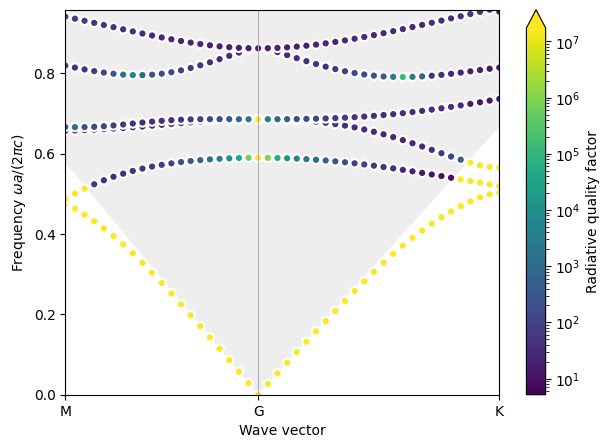

In [55]:
# Run the final simulation for the optimized parameters
phc = daisy_phc(p_opt_eta[0], p_opt_eta[1], p_opt_eta[2])
gme_opt_eta = legume.GuidedModeExp(phc, gmax=gmax)
gme_opt_eta.run(kpoints=np.array([[0], [0]]), **options)

eta_u_opt = calculate_overlap_factor(gme_opt_eta, 0)
print("Optimized eta_u: ", eta_u_opt)

# Plot the optimized bands
path = lattice.bz_path(['M', 'G', 'K'], [20, 25])
gme_opt_eta.run(kpoints=path['kpoints'], **options)
plot_bands(gme_opt_eta)
